# Clustering

Vamos a realizar operaciones de **clustering** (segmentación) de datos.
La idea es encontrar una estructura dentro de un dataset donde originalmente no la había.
No se tiene un objetivo de predicción (se trata **aprendizaje no supervisado**), sino de uno de entendimiento de los datos a través del particionamiento del dataset en grupos de instancias.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

# K-Means con datos reales

In [2]:
data = pd.read_csv('webdata2.csv', na_values=".")
print(data.shape)
data = data.drop("ID", axis=1) # droping ID column
print(data.shape)
data.head(5)

(77, 55)
(77, 54)


time (s)  errors_1  item changes_1  dist_scrollup_1  n_scrollup_1  \
0       294         0               0             2900           160   
1       900         0               5            11574           284   
2       715         0               7            22466           526   
3       400         0               3             5000           214   
4       484         0               3             5600           233   

   dist_scrolldown_1  n_scrolldown_1  errors_2  item changes_2  \
0               4016             195         0               5   
1              15924             615        13              11   
2              26752             663         6              19   
3               6882             383         1               1   
4               9882             489         0               6   

   dist_scrollup_2        ...          following music  music likability  \
0            11600        ...                        6                 4   
1            38320        ...                        1                 1   
2            53938        ...                        5                 1   
3            14365        ...                        7                 3   
4            36170        ...                        5                 4   

   music pleasant  music good  music familiarity  music nostalgia  \
0               7           4                  2                6   
1               1           1                  1                1   
2               1           1                  1                1   
3               2           2                  4                6   
4               3           3                  5                2   

   music relevance  gender  age  musical education  
0                7  Hombre   21                  0  
1                1   Mujer   21                  0  
2                1   Mujer   23                  0  
3                6   Mujer   19                  2  
4                4   Mujer   21                  0  

[5 rows x 54 columns]

In [3]:
data.describe(include="all")

time (s)   errors_1  item changes_1  dist_scrollup_1  n_scrollup_1  \
count    77.000000  77.000000       77.000000        77.000000     77.000000   
unique         NaN        NaN             NaN              NaN           NaN   
top            NaN        NaN             NaN              NaN           NaN   
freq           NaN        NaN             NaN              NaN           NaN   
mean    493.272727   0.168831        3.207792      9756.181818    318.701299   
std     245.528948   0.615643        3.784795      9856.519930    268.324483   
min      16.000000   0.000000        0.000000         0.000000      0.000000   
25%     313.000000   0.000000        1.000000      2500.000000    125.000000   
50%     403.000000   0.000000        2.000000      6300.000000    243.000000   
75%     684.000000   0.000000        5.000000     13693.000000    418.000000   
max     900.000000   4.000000       22.000000     45779.000000   1063.000000   

        dist_scrolldown_1  n_scrolldown_1   errors_2  item changes_2  \
count           77.000000       77.000000  77.000000       77.000000   
unique                NaN             NaN        NaN             NaN   
top                   NaN             NaN        NaN             NaN   
freq                  NaN             NaN        NaN             NaN   
mean         11839.792208      476.506494   1.636364        7.480519   
std          10679.139337      303.154018   3.414016        7.338812   
min            700.000000       41.000000   0.000000        1.000000   
25%           4016.000000      225.000000   0.000000        3.000000   
50%           7900.000000      417.000000   0.000000        5.000000   
75%          16407.000000      704.000000   1.000000        8.000000   
max          49937.000000     1201.000000  17.000000       45.000000   

        dist_scrollup_2        ...          following music  music likability  \
count         77.000000        ...                77.000000         77.000000   
unique              NaN        ...                      NaN               NaN   
top                 NaN        ...                      NaN               NaN   
freq                NaN        ...                      NaN               NaN   
mean       18972.558442        ...                 3.454545          3.532468   
std        15611.722201        ...                 1.983786          2.131125   
min            0.000000        ...                 1.000000          1.000000   
25%         8800.000000        ...                 1.000000          1.000000   
50%        13090.000000        ...                 3.000000          3.000000   
75%        22252.000000        ...                 5.000000          5.000000   
max        68514.000000        ...                 7.000000          7.000000   

        music pleasant  music good  music familiarity  music nostalgia  \
count        77.000000   77.000000          77.000000        77.000000   
unique             NaN         NaN                NaN              NaN   
top                NaN         NaN                NaN              NaN   
freq               NaN         NaN                NaN              NaN   
mean          3.792208    3.597403           3.714286         2.974026   
std           2.220346    2.147580           2.145112         2.194335   
min           1.000000    1.000000           1.000000         1.000000   
25%           1.000000    1.000000           2.000000         1.000000   
50%           4.000000    4.000000           4.000000         2.000000   
75%           6.000000    5.000000           5.000000         5.000000   
max           7.000000    7.000000           7.000000         7.000000   

        music relevance  gender        age  musical education  
count         77.000000      77  77.000000          77.000000  
unique              NaN       2        NaN                NaN  
top                 NaN   Mujer        NaN                NaN  
freq                NaN      44        NaN                NaN  
me

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 54 columns):
time (s)                77 non-null int64
errors_1                77 non-null int64
item changes_1          77 non-null int64
dist_scrollup_1         77 non-null int64
n_scrollup_1            77 non-null int64
dist_scrolldown_1       77 non-null int64
n_scrolldown_1          77 non-null int64
errors_2                77 non-null int64
item changes_2          77 non-null int64
dist_scrollup_2         77 non-null int64
n_scrollup_2            77 non-null int64
dist_scrolldown_2       77 non-null int64
n_scrolldown_2          77 non-null int64
errors_3                77 non-null int64
item changes_3          77 non-null int64
dist_scrollup_3         77 non-null int64
n_scrollup_3            77 non-null int64
dist_scrolldown_3       77 non-null int64
n_scrolldown_3          77 non-null int64
errors                  77 non-null int64
item changes            77 non-null int64
time over      

## Preparación de los datos

**¿Qué problemas saltan a la vista al inspeccionar los datos?**

1. Las variable age tiene tipo int64, cuando en realidad codifica categorías. Es necesario cambiar su tipo.
1. Tenemos en todas las variables de consumo valores anormalmente grandes que pueden considerarse excepciones en el mejor de los casos (anomalías o errores de captura en el peor de los casos). Hay que identificar los registros en cuestión y evaluar la posibilidad de descartarlos pues pueden influenciar negativamente muchos de los modelos que se pueden aprender a partir de los datos.
1. Las escalas de las variables que denotan los montos consumidos de cada tipo de productos son muy disparejas. Es necesario normalizar los datos ya que de no hacerlo se otorgaría una importancia demasiado desmedida a variables como Fresh casi que ignorando variables como Delicatessen.

Arreglamos primero los tipos de datos incorrectos:

In [60]:
data.age = data.age.astype(str)
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 55 columns):
time (s)                77 non-null int64
errors_1                77 non-null int64
item changes_1          77 non-null int64
dist_scrollup_1         77 non-null int64
n_scrollup_1            77 non-null int64
dist_scrolldown_1       77 non-null int64
n_scrolldown_1          77 non-null int64
errors_2                77 non-null int64
item changes_2          77 non-null int64
dist_scrollup_2         77 non-null int64
n_scrollup_2            77 non-null int64
dist_scrolldown_2       77 non-null int64
n_scrolldown_2          77 non-null int64
errors_3                77 non-null int64
item changes_3          77 non-null int64
dist_scrollup_3         77 non-null int64
n_scrollup_3            77 non-null int64
dist_scrolldown_3       77 non-null int64
n_scrolldown_3          77 non-null int64
errors                  77 non-null int64
item changes            77 non-null int64
time over      

time (s)   errors_1  item changes_1  dist_scrollup_1  n_scrollup_1  \
count    77.000000  77.000000       77.000000        77.000000     77.000000   
unique         NaN        NaN             NaN              NaN           NaN   
top            NaN        NaN             NaN              NaN           NaN   
freq           NaN        NaN             NaN              NaN           NaN   
mean    493.272727   0.168831        3.207792      9756.181818    318.701299   
std     245.528948   0.615643        3.784795      9856.519930    268.324483   
min      16.000000   0.000000        0.000000         0.000000      0.000000   
25%     313.000000   0.000000        1.000000      2500.000000    125.000000   
50%     403.000000   0.000000        2.000000      6300.000000    243.000000   
75%     684.000000   0.000000        5.000000     13693.000000    418.000000   
max     900.000000   4.000000       22.000000     45779.000000   1063.000000   

        dist_scrolldown_1  n_scrolldown_1   errors_2  item changes_2  \
count           77.000000       77.000000  77.000000       77.000000   
unique                NaN             NaN        NaN             NaN   
top                   NaN             NaN        NaN             NaN   
freq                  NaN             NaN        NaN             NaN   
mean         11839.792208      476.506494   1.636364        7.480519   
std          10679.139337      303.154018   3.414016        7.338812   
min            700.000000       41.000000   0.000000        1.000000   
25%           4016.000000      225.000000   0.000000        3.000000   
50%           7900.000000      417.000000   0.000000        5.000000   
75%          16407.000000      704.000000   1.000000        8.000000   
max          49937.000000     1201.000000  17.000000       45.000000   

        dist_scrollup_2      ...       music likability  music pleasant  \
count         77.000000      ...              77.000000       77.000000   
unique              NaN      ...                    NaN             NaN   
top                 NaN      ...                    NaN             NaN   
freq                NaN      ...                    NaN             NaN   
mean       18972.558442      ...               3.532468        3.792208   
std        15611.722201      ...               2.131125        2.220346   
min            0.000000      ...               1.000000        1.000000   
25%         8800.000000      ...               1.000000        1.000000   
50%        13090.000000      ...               3.000000        4.000000   
75%        22252.000000      ...               5.000000        6.000000   
max        68514.000000      ...               7.000000        7.000000   

        music good  music familiarity  music nostalgia  music relevance  \
count    77.000000          77.000000        77.000000        77.000000   
unique         NaN                NaN              NaN              NaN   
top            NaN                NaN              NaN              NaN   
freq           NaN                NaN              NaN              NaN   
mean      3.597403           3.714286         2.974026         3.103896   
std       2.147580           2.145112         2.194335         2.167854   
min       1.000000           1.000000         1.000000         1.000000   
25%       1.000000           2.000000         1.000000         1.000000   
50%       4.000000           4.000000         2.000000         3.000000   
75%       5.000000           5.000000         5.000000         5.000000   
max       7.000000           7.000000         7.000000         7.000000   

        gender  age  musical education    diff_times  
count       77   77          77.000000     77.000000  
unique       2   15                NaN           NaN  
top      Mujer   21                NaN           NaN  
freq        44   19                NaN           NaN  
mean       NaN  NaN           0.311688    550.519481  
std        NaN  NaN           0.590712   3618.303948

Antes de normalizar es necesario limpiar las excepciones o anomalías con valores o muy grandes o muy pequeñas. Vamos a analizar las variables numéricas a partir de diagramas de cajas y bigotes.

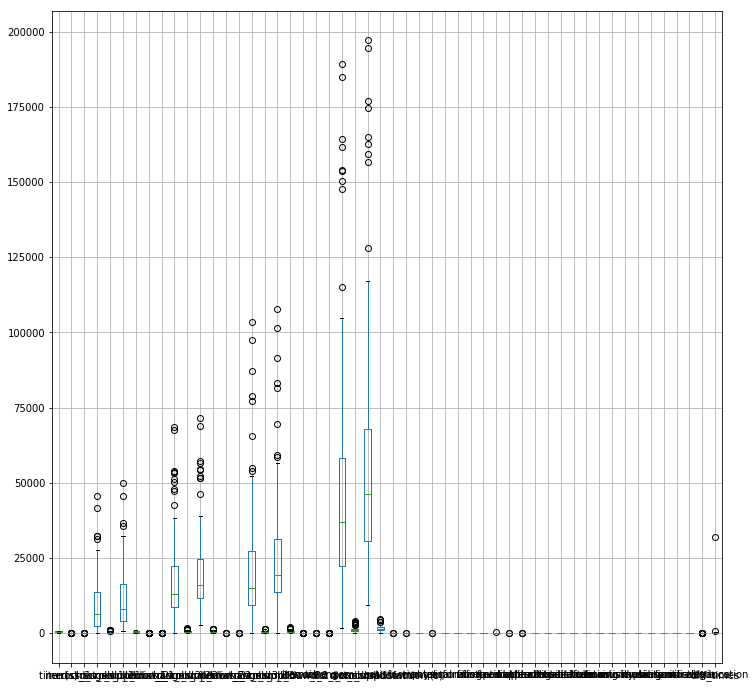

In [61]:
plt.figure(figsize=(12,12))
data.boxplot()

In [62]:
data.shape

(77, 55)

Vamos ahora a normalizar los datos para que todas las variables tengan la misma importancia. Solo vamos a considerar los datos numéricos.

In [63]:
dataStd1 = pd.DataFrame(preprocessing.scale(data.iloc[:,0:34]))
dataStd1.columns=data.columns[0:34]

dataStd2 = pd.DataFrame(preprocessing.scale(data.iloc[:,35:51]))
dataStd2.columns=data.columns[35:51]

dataStd3 = pd.DataFrame(preprocessing.scale(data.iloc[:,53]))
dataStd3.columns=[data.columns[53]]

dataStd = pd.concat([dataStd1, dataStd2, dataStd3], axis=1, sort=False)
# dataStd = data
# dataStd.iloc[:,0:21] = dataStd1
# dataStd.iloc[:,22:34] = dataStd2
# dataStd.iloc[:,35:51] = dataStd3

In [9]:
dataStd.mean(axis=0)

time (s)                1.326500e-16
errors_1               -5.046468e-17
item changes_1         -7.209240e-19
dist_scrollup_1         1.441848e-18
n_scrollup_1            2.595327e-17
dist_scrolldown_1      -8.651089e-17
n_scrolldown_1          5.190653e-17
errors_2               -2.306957e-17
item changes_2          4.037175e-17
dist_scrollup_2        -4.902283e-17
n_scrollup_2            7.930164e-17
dist_scrolldown_2       1.441848e-18
n_scrolldown_2          7.497610e-17
errors_3                5.190653e-17
item changes_3          4.325544e-17
dist_scrollup_3        -9.912706e-17
n_scrollup_3            7.209240e-17
dist_scrolldown_3       3.099973e-17
n_scrolldown_3         -4.404395e-17
errors                 -7.209240e-17
item changes            8.074349e-17
time over               6.344132e-17
dist_scrollup          -1.009294e-17
n_scrollup              1.874403e-17
dist_scrolldown         9.155735e-17
n_scrolldown            8.506904e-17
satisfaction            2.047424e-16
s

In [10]:
dataStd.std(axis=0)

time (s)                1.006557
errors_1                1.006557
item changes_1          1.006557
dist_scrollup_1         1.006557
n_scrollup_1            1.006557
dist_scrolldown_1       1.006557
n_scrolldown_1          1.006557
errors_2                1.006557
item changes_2          1.006557
dist_scrollup_2         1.006557
n_scrollup_2            1.006557
dist_scrolldown_2       1.006557
n_scrolldown_2          1.006557
errors_3                1.006557
item changes_3          1.006557
dist_scrollup_3         1.006557
n_scrollup_3            1.006557
dist_scrolldown_3       1.006557
n_scrolldown_3          1.006557
errors                  1.006557
item changes            1.006557
time over               1.006557
dist_scrollup           1.006557
n_scrollup              1.006557
dist_scrolldown         1.006557
n_scrolldown            1.006557
satisfaction            1.006557
satisfaction (s)        1.006557
mental                  1.006557
physical                1.006557
temporal  

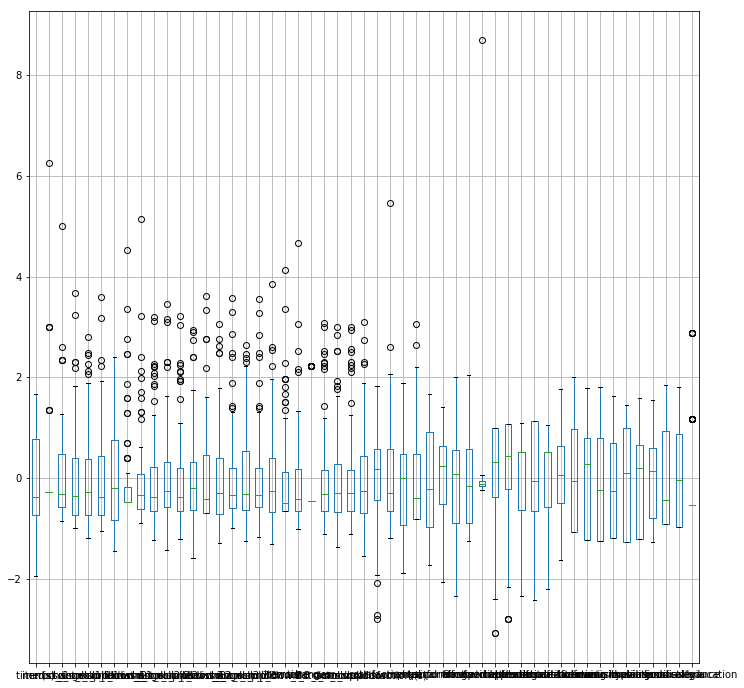

In [65]:
plt.figure(figsize=(12,12))
dataStd.boxplot()

## Clustering

**Con un k de 3, realice un clustering por K-Means (utilicen random_state=0).**

**Agregue una columna "Cluster" con el segmento correspondiente (0, 1, o 2) al dataset.**

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

El método KMeans en scikit-learn permite definir los valores de ciertos parámetros que controlan la ejecución del algoritmo de clustering. Nos interesan particularmente:
- **n_clusters**: número de clusters que se desean (el parámetro "K"). Por defecto es 8.
- **init**: el método de inicialización de los centroides. Por defecto es "k-means++". Otros valores son "random" o un array con los centroides iniciales
- **n_init**: número de inicializaciones diferentes a ensayar para evitar llegar a un óptimo local. Por defecto es 10
- **max_iter**: Máximo número de iteraciones que se esparará para llegar a convergencia. Por defecto es 300.
- **tol**: tolerancia para determinar que se ha llegado o no a convergenia con respecto a la reducción del WSS (interia). Por defecto es 0.0001
- **random_state**: semilla de inicialización del generador pseudo-aleatorio para poder reproducir los resultados.

El objeto resultado del KMeans después de lanzado el ajuste del algoritmo consta de diferentes valores de salida:
- **cluster_centers_**: los centroides finales de los clusters.
- **labels_**: los clusters a los cuales termina perteneciendo cada instancia del set de aprendizaje.
- **interia_**: el WSS final.
- **n_iter_**: el número de iteraciones que tomó llegar a convergencia.

In [66]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:n",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 3 iteraciones llegar a convergencia, con un WSS final de:n 2459.3392920923216 y los centroides siguientes: [[-0.42626519 -0.13177189 -0.27427757 -0.356607   -0.37676473 -0.36635061
  -0.3155462  -0.27433468 -0.30794469 -0.36699812 -0.29848758 -0.36598183
  -0.25489399 -0.33954677 -0.38306226 -0.40779858 -0.46463075 -0.40106514
  -0.46945155 -0.3328134  -0.35920697 -0.45069391 -0.41266323 -0.41776833
  -0.41137021 -0.39655707  0.00368855  0.0485753  -0.24974736 -0.04968234
  -0.09209754  0.42685999 -0.00203756 -0.27101455 -0.14253404  0.24866686
   0.33404141  0.34446258  0.20799596  0.44256784  0.59937259  0.26329288
   0.48909974  0.60507194  0.74870034  0.70753273  0.71252928  0.75511047
   0.53807872  0.6891944  -0.02993995 -0.11074755]
 [ 1.60034067  0.77501854  1.23648392  1.52941084  1.62756378  1.5600872
   1.43647561  1.18123827  1.39381906  1.70714653  1.47842876  1.70207241
   1.46272353  1.5831189   1.59193734  1.73133137  1.65442086  1.7276223
   1.64969879

In [67]:
kmeans.labels_

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2])

También podemos utilizar el objeto kmeans resultante como modelo de clasificación, al que a través del método *predict* se le puede enviar un dataset para evaluar y obtener los clusters a los que pertenecen. Por ejemplo, utilicemoslo para clasificar los mismos ejemplos de entrenamiento:

In [95]:
clusters = kmeans.predict(dataStd)
clusters

ValueError: Incorrect number of features. Got 46 features, expected 45

In [15]:
counter=Counter(clusters)
print(counter)

Counter({0: 34, 2: 29, 1: 14})


Tenemos 3 clusters de 34, 29 y 14 instancias cada uno.
Agregamos una columna al dataframe con los datos analizados que indique a qué cluster pertenece cada registro.

In [47]:
data.loc[:,'Cluster'] = clusters
dataStd.loc[:,'Cluster'] = clusters

In [17]:
data.columns

Index(['time (s)', 'errors_1', 'item changes_1', 'dist_scrollup_1',
       'n_scrollup_1', 'dist_scrolldown_1', 'n_scrolldown_1', 'errors_2',
       'item changes_2', 'dist_scrollup_2', 'n_scrollup_2',
       'dist_scrolldown_2', 'n_scrolldown_2', 'errors_3', 'item changes_3',
       'dist_scrollup_3', 'n_scrollup_3', 'dist_scrolldown_3',
       'n_scrolldown_3', 'errors', 'item changes', 'time over',
       'dist_scrollup', 'n_scrollup', 'dist_scrolldown', 'n_scrolldown',
       'satisfaction', 'satisfaction (s)', 'mental', 'physical', 'temporal',
       'performance', 'effort', 'frustration', 'music perception',
       'time perception', 'good attitude', 'favorable attitude',
       'likable attitude', 'appealing attitude', 'result satisfaction ',
       'music attention', 'music over activity', 'brain music',
       'following music', 'music likability', 'music pleasant', 'music good',
       'music familiarity', 'music nostalgia', 'music relevance', 'gender',
       'age', 'musical

In [18]:
data.head()

time (s)  errors_1  item changes_1  dist_scrollup_1  n_scrollup_1  \
0       294         0               0             2900           160   
1       900         0               5            11574           284   
2       715         0               7            22466           526   
3       400         0               3             5000           214   
4       484         0               3             5600           233   

   dist_scrolldown_1  n_scrolldown_1  errors_2  item changes_2  \
0               4016             195         0               5   
1              15924             615        13              11   
2              26752             663         6              19   
3               6882             383         1               1   
4               9882             489         0               6   

   dist_scrollup_2   ...     music likability  music pleasant  music good  \
0            11600   ...                    4               7           4   
1            38320   ...                    1               1           1   
2            53938   ...                    1               1           1   
3            14365   ...                    3               2           2   
4            36170   ...                    4               3           3   

   music familiarity  music nostalgia  music relevance  gender  age  \
0                  2                6                7  Hombre   21   
1                  1                1                1   Mujer   21   
2                  1                1                1   Mujer   23   
3                  4                6                6   Mujer   19   
4                  5                2                4   Mujer   21   

   musical education  Cluster  
0                  0        0  
1                  0        1  
2                  0        1  
3                  2        0  
4                  0        0  

[5 rows x 55 columns]

In [48]:
file_name= 'behavior_data_with_clusters.csv'
data.to_csv(file_name, sep=',', encoding='utf-8')

# Parte 3. Interpretación de los clusters

## Interpretación de los clusters, con k =3

Vamos a tratar de entender cuales son las características de los registros que los componen. Para ello vamos a ver gráficos de densidad que permitan identificar las predilecciones de compras de los clientes que pertenecen a cada cluster.

In [25]:
var_num = ['time (s)','errors_1','item changes_1','dist_scrollup_1','n_scrollup_1','dist_scrolldown_1','n_scrolldown_1','errors_2','item changes_2','dist_scrollup_2','n_scrollup_2','dist_scrolldown_2','n_scrolldown_2','errors_3','item changes_3','dist_scrollup_3','n_scrollup_3','dist_scrolldown_3','n_scrolldown_3','errors','item changes','time over','dist_scrollup','n_scrollup','dist_scrolldown','n_scrolldown','satisfaction','satisfaction (s)','mental','physical','temporal','performance','effort','frustration','time perception','good attitude','favorable attitude','likable attitude','appealing attitude','result satisfaction ','music attention','music over activity','brain music','following music','music likability','music pleasant','music good','music familiarity','music nostalgia','music relevance','musical education']

In [26]:
import warnings
warnings.filterwarnings('ignore')

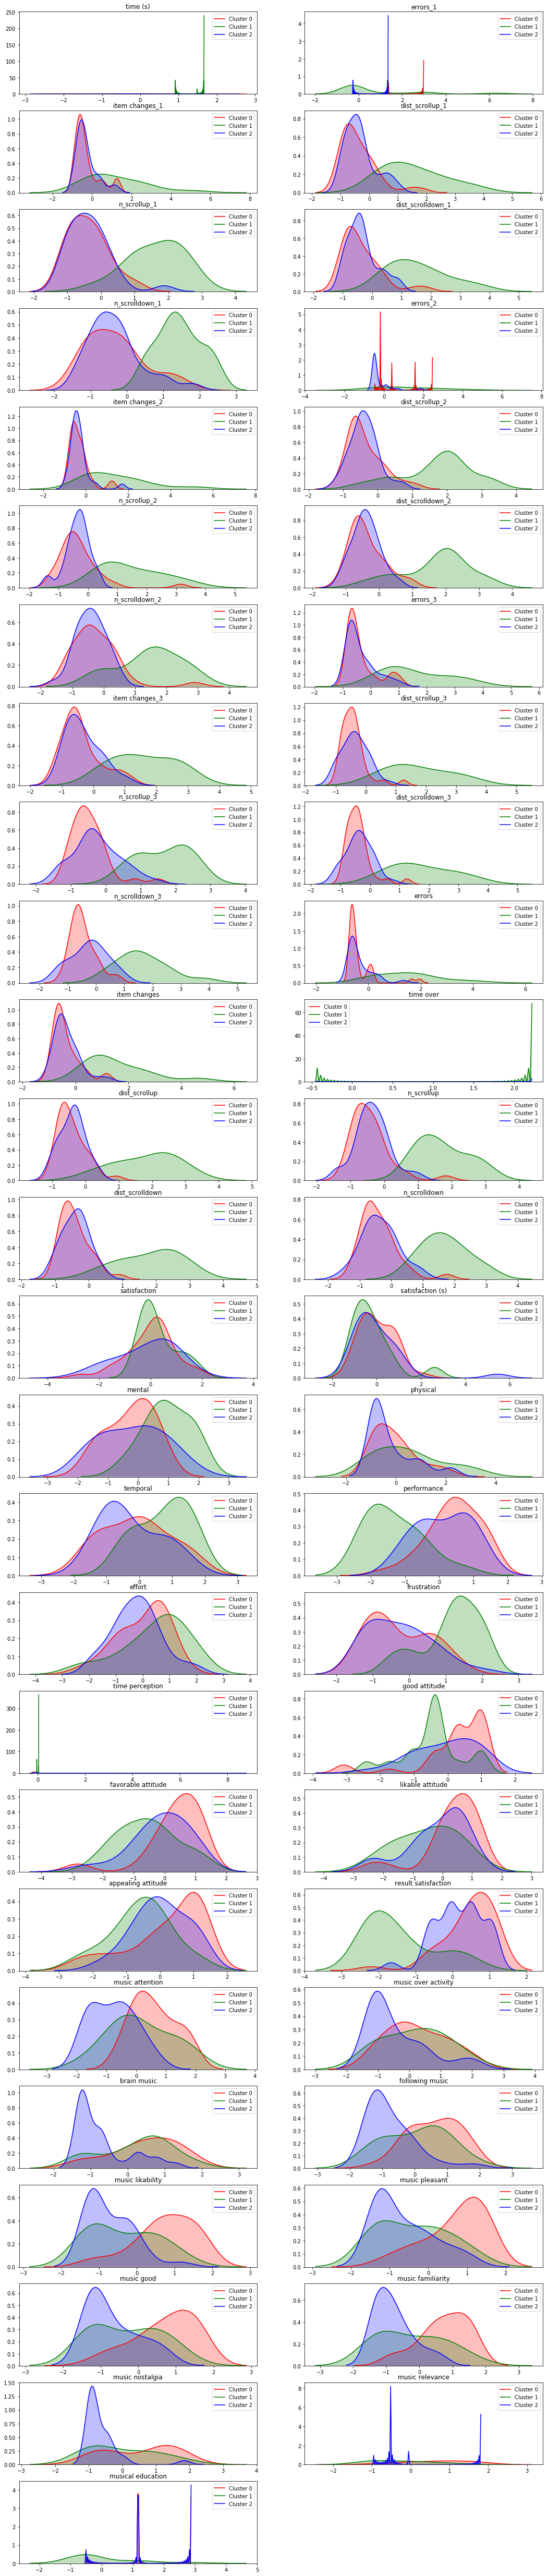

In [27]:
fig = plt.figure(figsize=(18,90))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

Veámoslos en scatterplots para entender mejor las diferencias:

In [ ]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="errors", y="item_changes", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("errors vs. item_changes")
plt.show()

Cómo se puede distinguir entre:
- los rojos y los demás
- los verdes y los demás
- los azules y los demás

Podemos interpretar entonces los clusters de esta manera:
- Cluster 0 (Rojo, 238 registros). Tiene valores:
    - Altos : Milk, Grocery, Detergents_Paper
    - Medios: Delicassen
    - Bajos : Fresh, Frozen
- Cluster 1 (Verde, 93 registros). Tiene valores:
    - Altos : 
    - Medios: 
    - Bajos : Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen
- Cluster 2 (Azul, 87 registros). Tiene valores:
    - Altos : Fresh, Frozen
    - Medios: Delicassen
    - Bajos : Milk , Grocery, Detergents_Paper
    

**Qué podemos decir de los 3 clusters, qué adjetivo les darían para describirlos?**

## Interpretación de los clusters, con k = 2

Repetimos el análisis con k=2

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [30]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 63, 1: 14})


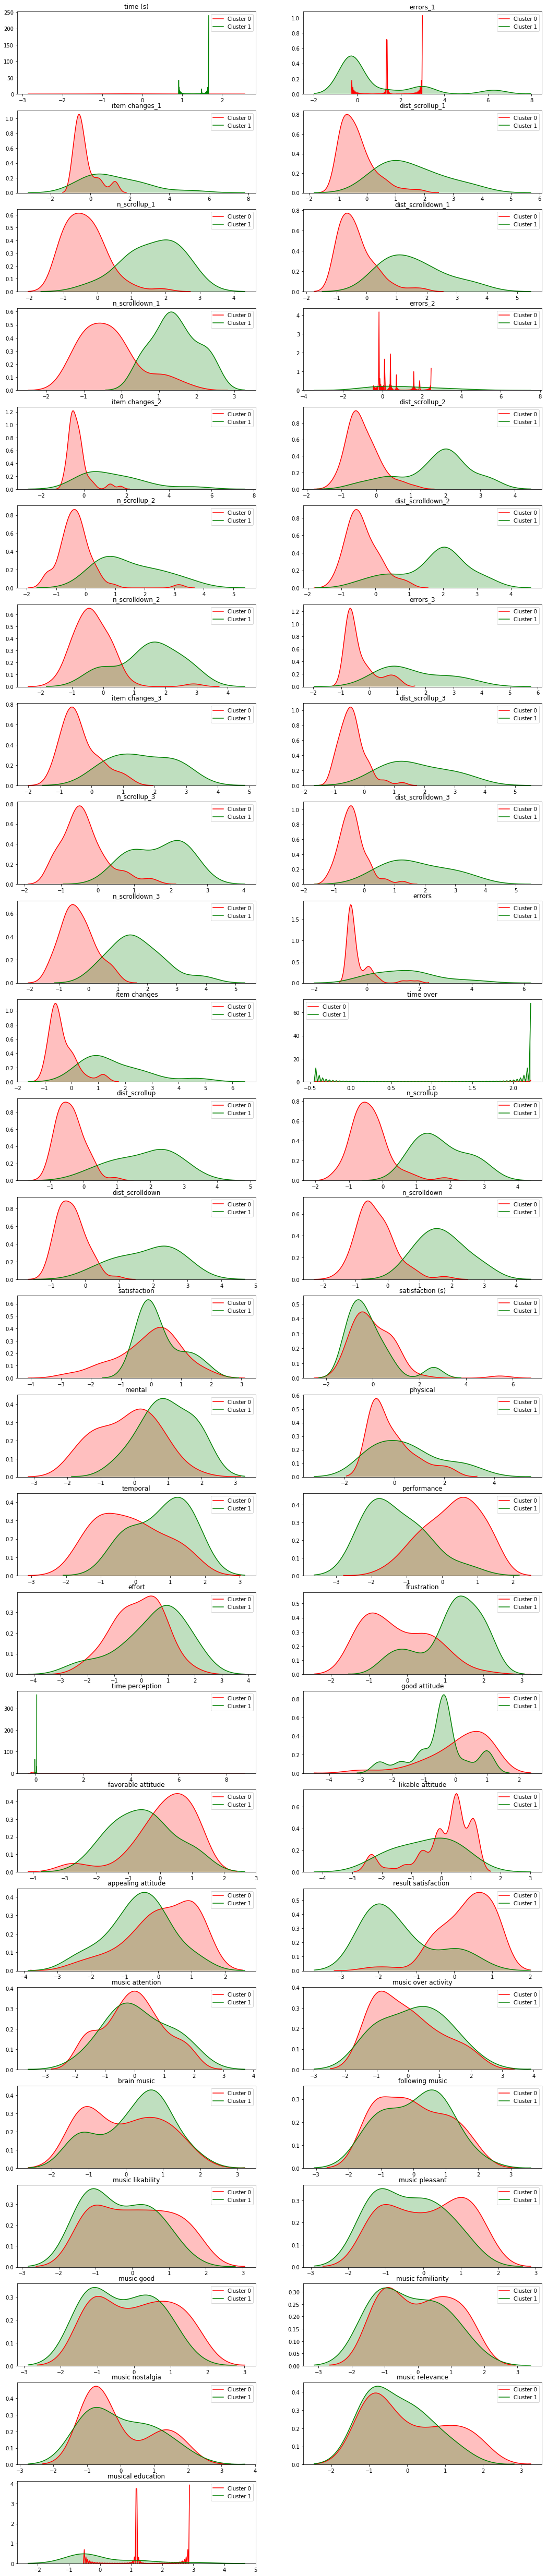

In [34]:
fig = plt.figure(figsize=(18,90))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax)
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1'])
    i+=1

Veamoslos en scatterplots para entender mejor las diferencias:

In [127]:
data.loc[:,'Cluster'] = clusters
dataStd.loc[:,'Cluster'] = clusters

In [97]:
data.columns

Index(['time (s)', 'errors_1', 'item changes_1', 'dist_scrolls_1',
       'n_scrolls_1', 'errors_2', 'item changes_2', 'dist_scrolls_2',
       'n_scrolls_2', 'errors_3', 'item changes_3', 'dist_scrolls_3',
       'n_scrolls_3', 'errors', 'item changes', 'time over', 'dist_scrolls',
       'n_scrolls', 'satisfaction', 'satisfaction (s)', 'mental', 'physical',
       'temporal', 'performance', 'effort', 'frustration', 'music perception',
       'time perception', 'good attitude', 'favorable attitude',
       'likable attitude', 'appealing attitude', 'result satisfaction ',
       'music attention', 'music over activity', 'brain music',
       'following music', 'music likability', 'music pleasant', 'music good',
       'music familiarity', 'music nostalgia', 'music relevance', 'gender',
       'age', 'musical education', 'diff_times', 'Cluster'],
      dtype='object')

In [98]:
data.head()

time (s)  errors_1  item changes_1  dist_scrolls_1  n_scrolls_1  errors_2  \
0       294         0               0            6916          355         0   
1       900         0               5           27498          899        13   
2       715         0               7           49218         1189         6   
3       400         0               3           11882          597         1   
4       484         0               3           15482          722         0   

   item changes_2  dist_scrolls_2  n_scrolls_2  errors_3   ...     \
0               5           27226         1199         0   ...      
1              11           77145         1757         3   ...      
2              19          110476         2160         6   ...      
3               1           30512          734         0   ...      
4               6           72734         1256         2   ...      

   music pleasant  music good  music familiarity  music nostalgia  \
0               7           4                  2                6   
1               1           1                  1                1   
2               1           1                  1                1   
3               2           2                  4                6   
4               3           3                  5                2   

   music relevance  gender  age  musical education  diff_times  Cluster  
0                7  Hombre   21                  0          54        0  
1                1   Mujer   21                  0           0        2  
2                1   Mujer   23                  0         185        2  
3                6   Mujer   19                  2         200        0  
4                4   Mujer   21                  0         116        0  

[5 rows x 48 columns]

In [128]:
file_name= 'behavior_data_with_3_clusters.csv'
data.to_csv(file_name, sep=',', encoding='utf-8')

In [ ]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b", "y"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="Fresh", y="Milk", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Milk")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="Frozen", y="Grocery", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Frozen vs. Grocery")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="Delicassen", y="Detergents_Paper", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Delicassen vs. Detergents_Paper")
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x="Fresh", y="Frozen", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Frozen")

Cómo se puede distinguir entre:
- los rojos y los demás
- los verdes y los demás
- los azules y los demás
- los amarillos y los demás

## K-Means con time_diff

In [14]:
data = pd.read_csv('webdata2.csv', na_values=".")
print(data.shape)
data = data.drop("ID", axis=1) # droping ID column

print(data.shape)
data.head(5)

(77, 48)
(77, 47)


time (s)  errors_1  item changes_1  dist_scrolls_1  n_scrolls_1  errors_2  \
0       294         0               0            6916          355         0   
1       900         0               5           27498          899        13   
2       715         0               7           49218         1189         6   
3       400         0               3           11882          597         1   
4       484         0               3           15482          722         0   

   item changes_2  dist_scrolls_2  n_scrolls_2  errors_3     ...      \
0               5           27226         1199         0     ...       
1              11           77145         1757         3     ...       
2              19          110476         2160         6     ...       
3               1           30512          734         0     ...       
4               6           72734         1256         2     ...       

   music likability  music pleasant  music good  music familiarity  \
0                 4               7           4                  2   
1                 1               1           1                  1   
2                 1               1           1                  1   
3                 3               2           2                  4   
4                 4               3           3                  5   

   music nostalgia  music relevance  gender  age  musical education  \
0                6                7  Hombre   21                  0   
1                1                1   Mujer   21                  0   
2                1                1   Mujer   23                  0   
3                6                6   Mujer   19                  2   
4                2                4   Mujer   21                  0   

   diff_times  
0          54  
1           0  
2         185  
3         200  
4         116  

[5 rows x 47 columns]

In [15]:
data.describe(include="all")

time (s)   errors_1  item changes_1  dist_scrolls_1  n_scrolls_1  \
count    77.000000  77.000000       77.000000       77.000000    77.000000   
unique         NaN        NaN             NaN             NaN          NaN   
top            NaN        NaN             NaN             NaN          NaN   
freq           NaN        NaN             NaN             NaN          NaN   
mean    493.272727   0.168831        3.207792    21595.974026   795.207792   
std     245.528948   0.615643        3.784795    20495.197701   561.271848   
min      16.000000   0.000000        0.000000      700.000000    52.000000   
25%     313.000000   0.000000        1.000000     6754.000000   381.000000   
50%     403.000000   0.000000        2.000000    15200.000000   684.000000   
75%     684.000000   0.000000        5.000000    31034.000000  1171.000000   
max     900.000000   4.000000       22.000000    95716.000000  2193.000000   

         errors_2  item changes_2  dist_scrolls_2  n_scrolls_2   errors_3  \
count   77.000000       77.000000       77.000000    77.000000  77.000000   
unique        NaN             NaN             NaN          NaN        NaN   
top           NaN             NaN             NaN          NaN        NaN   
freq          NaN             NaN             NaN          NaN        NaN   
mean     1.636364        7.480519    40686.389610  1044.077922   2.441558   
std      3.414016        7.338812    31213.951596   655.931996   3.488679   
min      0.000000        1.000000     2900.000000    35.000000   0.000000   
25%      0.000000        3.000000    20500.000000   642.000000   0.000000   
50%      0.000000        5.000000    28483.000000   892.000000   1.000000   
75%      1.000000        8.000000    46249.000000  1226.000000   4.000000   
max     17.000000       45.000000   139126.000000  3119.000000  15.000000   

            ...       music likability  music pleasant  music good  \
count       ...              77.000000       77.000000   77.000000   
unique      ...                    NaN             NaN         NaN   
top         ...                    NaN             NaN         NaN   
freq        ...                    NaN             NaN         NaN   
mean        ...               3.532468        3.792208    3.597403   
std         ...               2.131125        2.220346    2.147580   
min         ...               1.000000        1.000000    1.000000   
25%         ...               1.000000        1.000000    1.000000   
50%         ...               3.000000        4.000000    4.000000   
75%         ...               5.000000        6.000000    5.000000   
max         ...               7.000000        7.000000    7.000000   

        music familiarity  music nostalgia  music relevance  gender  \
count           77.000000        77.000000        77.000000      77   
unique                NaN              NaN              NaN       2   
top                   NaN              NaN              NaN   Mujer   
freq                  NaN              NaN              NaN      44   
mean             3.714286         2.974026         3.103896     NaN   
std              2.145112         2.194335         2.167854     NaN   
min              1.000000         1.000000         1.000000     NaN   
25%              2.000000         1.000000         1.000000     NaN   
50%              4.000000         2.000000         3.000000     NaN   
75%              5.000000         5.000000         5.000000     NaN   
max              7.000000         7.000000         7.000000     NaN   

              age  musical education    diff_times  
count   77.000000          77.000000     77.000000  
unique        NaN                NaN           NaN  
top           NaN                NaN           NaN  
freq          NaN                NaN           NaN  
mean    22.051948           0.311688    550.519481  
std      7.528710           0.590712   3618.303948  
min     16.000000           0.000000      0.000000  
25%     19.000000           0.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 47 columns):
time (s)                77 non-null int64
errors_1                77 non-null int64
item changes_1          77 non-null int64
dist_scrolls_1          77 non-null int64
n_scrolls_1             77 non-null int64
errors_2                77 non-null int64
item changes_2          77 non-null int64
dist_scrolls_2          77 non-null int64
n_scrolls_2             77 non-null int64
errors_3                77 non-null int64
item changes_3          77 non-null int64
dist_scrolls_3          77 non-null int64
n_scrolls_3             77 non-null int64
errors                  77 non-null int64
item changes            77 non-null int64
time over               77 non-null int64
dist_scrolls            77 non-null int64
n_scrolls               77 non-null int64
satisfaction            77 non-null int64
satisfaction (s)        77 non-null int64
mental                  77 non-null int64
physical       

In [17]:
vars_to_log = ['errors_1', 'errors_2', 'errors_3', 'errors', 'item changes_1', 'item changes_2', 'item changes_3', 'item changes', 'dist_scrolls_1', 'dist_scrolls_2', 'dist_scrolls_3', 'dist_scrolls',  'n_scrolls_1', 'n_scrolls_2', 'n_scrolls_3', 'n_scrolls']
for var in vars_to_log:
    data[var] = np.log(1 + data[var])

In [18]:
data.describe(include="all")

time (s)   errors_1  item changes_1  dist_scrolls_1  n_scrolls_1  \
count    77.000000  77.000000       77.000000       77.000000    77.000000   
unique         NaN        NaN             NaN             NaN          NaN   
top            NaN        NaN             NaN             NaN          NaN   
freq           NaN        NaN             NaN             NaN          NaN   
mean    493.272727   0.090711        1.141298        9.480579     6.381688   
std     245.528948   0.303898        0.750377        1.130534     0.858144   
min      16.000000   0.000000        0.000000        6.552508     3.970292   
25%     313.000000   0.000000        0.693147        8.818038     5.945421   
50%     403.000000   0.000000        1.098612        9.629116     6.529419   
75%     684.000000   0.000000        1.791759       10.342871     7.066467   
max     900.000000   1.609438        3.135494       11.469151     7.693482   

         errors_2  item changes_2  dist_scrolls_2  n_scrolls_2   errors_3  \
count   77.000000       77.000000       77.000000    77.000000  77.000000   
unique        NaN             NaN             NaN          NaN        NaN   
top           NaN             NaN             NaN          NaN        NaN   
freq          NaN             NaN             NaN          NaN        NaN   
mean     0.510089        1.900941       10.360345     6.759262   0.818602   
std      0.830491        0.647243        0.727613     0.682139   0.889267   
min      0.000000        0.693147        7.972811     3.583519   0.000000   
25%      0.000000        1.386294        9.928229     6.466145   0.000000   
50%      0.000000        1.791759       10.257098     6.794587   0.693147   
75%      0.693147        2.197225       10.741817     7.112327   1.609438   
max      2.890372        3.828641       11.843142     8.045588   2.772589   

            ...       music likability  music pleasant  music good  \
count       ...              77.000000       77.000000   77.000000   
unique      ...                    NaN             NaN         NaN   
top         ...                    NaN             NaN         NaN   
freq        ...                    NaN             NaN         NaN   
mean        ...               3.532468        3.792208    3.597403   
std         ...               2.131125        2.220346    2.147580   
min         ...               1.000000        1.000000    1.000000   
25%         ...               1.000000        1.000000    1.000000   
50%         ...               3.000000        4.000000    4.000000   
75%         ...               5.000000        6.000000    5.000000   
max         ...               7.000000        7.000000    7.000000   

        music familiarity  music nostalgia  music relevance  gender  \
count           77.000000        77.000000        77.000000      77   
unique                NaN              NaN              NaN       2   
top                   NaN              NaN              NaN   Mujer   
freq                  NaN              NaN              NaN      44   
mean             3.714286         2.974026         3.103896     NaN   
std              2.145112         2.194335         2.167854     NaN   
min              1.000000         1.000000         1.000000     NaN   
25%              2.000000         1.000000         1.000000     NaN   
50%              4.000000         2.000000         3.000000     NaN   
75%              5.000000         5.000000         5.000000     NaN   
max              7.000000         7.000000         7.000000     NaN   

              age  musical education    diff_times  
count   77.000000          77.000000     77.000000  
unique        NaN                NaN           NaN  
top           NaN                NaN           NaN  
freq          NaN                NaN           NaN  
mean    22.051948           0.311688    550.519481  
std      7.528710           0.590712   3618.303948  
min     16.000000           0.000000      0.000000  
25%     19.000000           0.

In [20]:
dataStd1 = pd.DataFrame(preprocessing.scale(data.iloc[:,0:26]))
dataStd1.columns=data.columns[0:26]

dataStd2 = pd.DataFrame(preprocessing.scale(data.iloc[:,27:43]))
dataStd2.columns=data.columns[27:43]

dataStd3 = pd.DataFrame(preprocessing.scale(data.iloc[:,44:47]))
dataStd3.columns=data.columns[44:47]

dataStd = pd.concat([dataStd1, dataStd2, dataStd3], axis=1, sort=False)
# dataStd = data
# dataStd.iloc[:,0:21] = dataStd1
# dataStd.iloc[:,22:34] = dataStd2
# dataStd.iloc[:,35:51] = dataStd3

In [21]:
dataStd.mean(axis=0)

time (s)                1.326500e-16
errors_1               -1.153478e-17
item changes_1          1.283245e-16
dist_scrolls_1          1.517545e-15
n_scrolls_1            -1.355337e-15
errors_2                6.344132e-17
item changes_2         -6.055762e-16
dist_scrolls_2          2.837557e-15
n_scrolls_2            -6.473898e-16
errors_3                1.153478e-17
item changes_3         -2.321375e-16
dist_scrolls_3         -3.460435e-16
n_scrolls_3            -3.914618e-16
errors                  1.413011e-16
item changes           -3.114392e-16
time over               6.344132e-17
dist_scrolls            5.738555e-16
n_scrolls               5.709718e-16
satisfaction            2.047424e-16
satisfaction (s)       -1.441848e-18
mental                 -1.441848e-17
physical               -7.497610e-17
temporal               -4.613914e-17
performance             1.268826e-16
effort                  1.384174e-16
frustration            -4.325544e-17
time perception         3.226135e-17
g

In [22]:
dataStd.std(axis=0)

time (s)                1.006557
errors_1                1.006557
item changes_1          1.006557
dist_scrolls_1          1.006557
n_scrolls_1             1.006557
errors_2                1.006557
item changes_2          1.006557
dist_scrolls_2          1.006557
n_scrolls_2             1.006557
errors_3                1.006557
item changes_3          1.006557
dist_scrolls_3          1.006557
n_scrolls_3             1.006557
errors                  1.006557
item changes            1.006557
time over               1.006557
dist_scrolls            1.006557
n_scrolls               1.006557
satisfaction            1.006557
satisfaction (s)        1.006557
mental                  1.006557
physical                1.006557
temporal                1.006557
performance             1.006557
effort                  1.006557
frustration             1.006557
time perception         1.006557
good attitude           1.006557
favorable attitude      1.006557
likable attitude        1.006557
appealing 

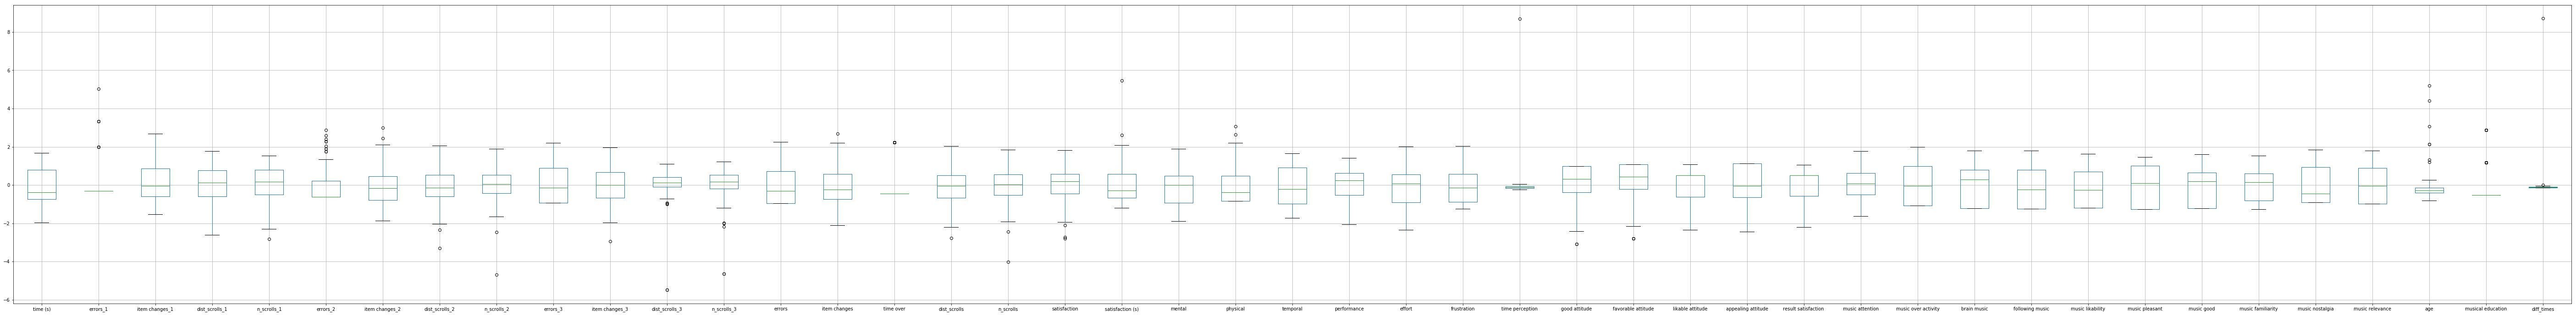

In [23]:
plt.figure(figsize=(100,12))
dataStd.boxplot()

Drop values that have a same value.

In [24]:
dataStd = dataStd.drop("time perception", axis=1) 
dataStd = dataStd.drop("diff_times", axis=1) 

### Interpretación de los clusters, con k = 3

Repetimos el análisis con k=3

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [26]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 34, 2: 23, 0: 20})


In [30]:
var_num = ['time (s)','errors_1','item changes_1','dist_scrolls_1','n_scrolls_1','errors_2','item changes_2','dist_scrolls_2','n_scrolls_2','errors_3','item changes_3','dist_scrolls_3','n_scrolls_3','errors','item changes','time over','dist_scrolls','n_scrolls','satisfaction','satisfaction (s)','mental','physical','temporal','performance','effort','frustration','good attitude','favorable attitude','likable attitude','appealing attitude','result satisfaction ','music attention','music over activity','brain music','following music','music likability','music pleasant','music good','music familiarity','music nostalgia','music relevance','age','musical education']

In [31]:
import warnings
warnings.filterwarnings('ignore')

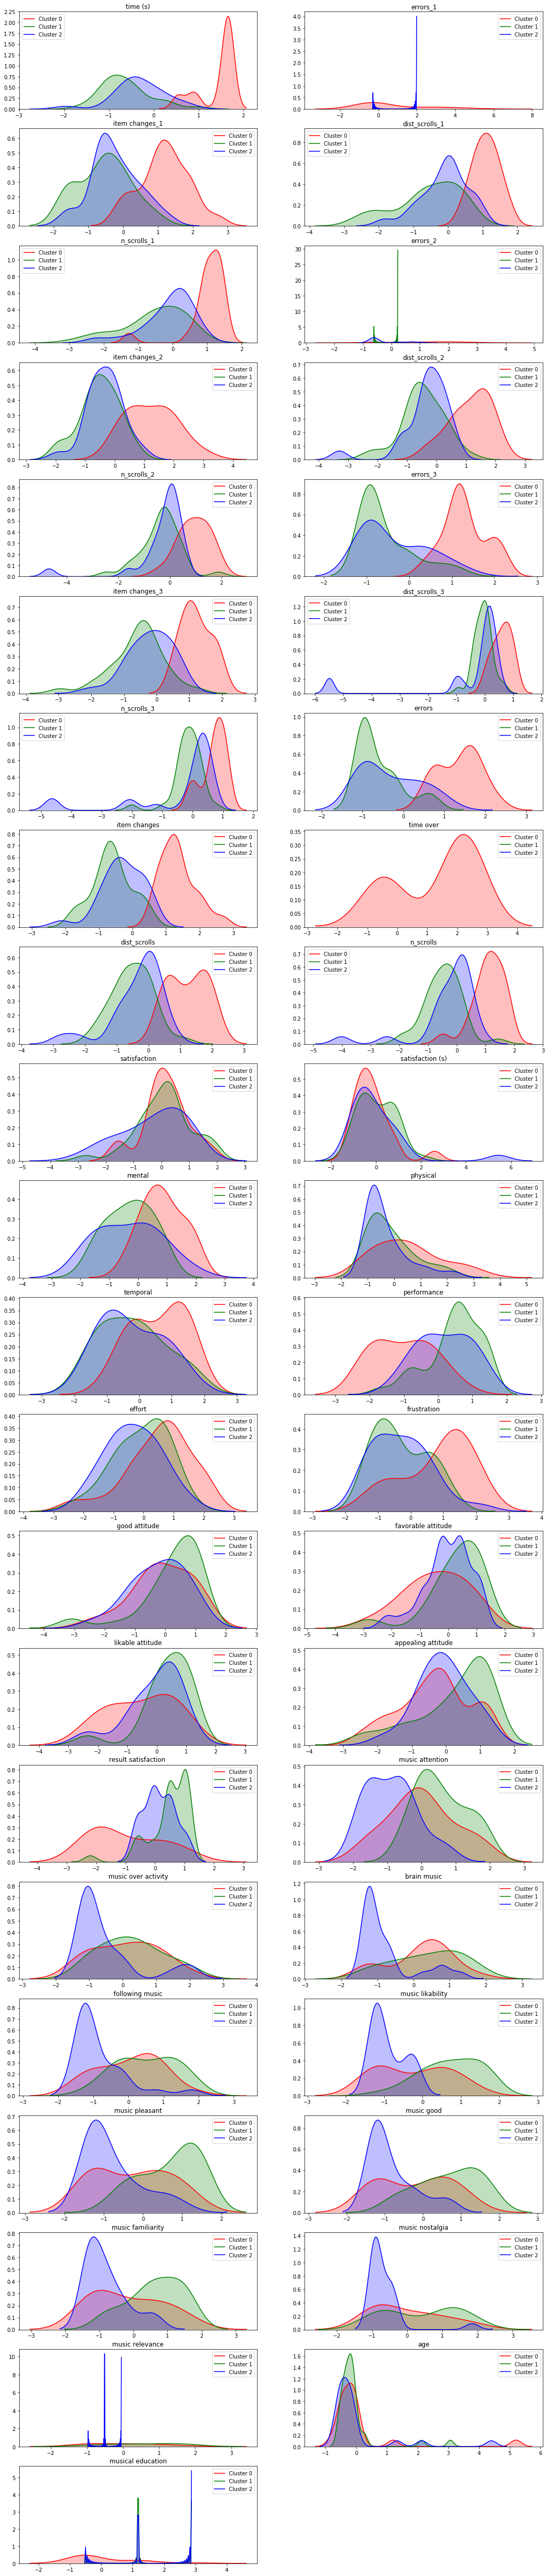

In [32]:
fig = plt.figure(figsize=(18,90))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

## K-Means solo behavior variables

In [35]:
data = data.iloc[:,:18]
print(data.shape)
data.head(5)

(77, 18)


time (s)  errors_1  item changes_1  dist_scrolls_1  n_scrolls_1  errors_2  \
0       294       0.0        0.000000        8.841737     5.874931  0.000000   
1       900       0.0        1.791759       10.221905     6.802395  2.639057   
2       715       0.0        2.079442       10.804035     7.081709  1.945910   
3       400       0.0        1.386294        9.382864     6.393591  0.693147   
4       484       0.0        1.386294        9.647498     6.583409  0.000000   

   item changes_2  dist_scrolls_2  n_scrolls_2  errors_3  item changes_3  \
0        1.791759       10.211964     7.090077  0.000000        1.791759   
1        2.484907       11.253455     7.471932  1.386294        2.484907   
2        2.995732       11.612563     7.678326  1.945910        3.401197   
3        0.693147       10.325908     6.599870  0.000000        2.302585   
4        1.945910       11.194578     7.136483  1.098612        2.564949   

   dist_scrolls_3  n_scrolls_3    errors  item changes  time over  \
0       10.659868     7.038784  0.000000      2.397895          0   
1       11.600323     7.620705  2.833213      3.332205          1   
2       11.975911     7.759187  2.564949      4.025352          0   
3       10.442871     6.582025  0.693147      2.639057          0   
4       11.577317     6.706862  1.098612      3.091042          0   

   dist_scrolls  n_scrolls  
0     11.248348   7.898782  
1     12.272684   8.454466  
2     12.671613   8.646817  
3     11.247566   7.627057  
4     12.180073   7.935945

In [36]:
data.describe(include="all")

time (s)   errors_1  item changes_1  dist_scrolls_1  n_scrolls_1  \
count   77.000000  77.000000       77.000000       77.000000    77.000000   
mean   493.272727   0.090711        1.141298        9.480579     6.381688   
std    245.528948   0.303898        0.750377        1.130534     0.858144   
min     16.000000   0.000000        0.000000        6.552508     3.970292   
25%    313.000000   0.000000        0.693147        8.818038     5.945421   
50%    403.000000   0.000000        1.098612        9.629116     6.529419   
75%    684.000000   0.000000        1.791759       10.342871     7.066467   
max    900.000000   1.609438        3.135494       11.469151     7.693482   

        errors_2  item changes_2  dist_scrolls_2  n_scrolls_2   errors_3  \
count  77.000000       77.000000       77.000000    77.000000  77.000000   
mean    0.510089        1.900941       10.360345     6.759262   0.818602   
std     0.830491        0.647243        0.727613     0.682139   0.889267   
min     0.000000        0.693147        7.972811     3.583519   0.000000   
25%     0.000000        1.386294        9.928229     6.466145   0.000000   
50%     0.000000        1.791759       10.257098     6.794587   0.693147   
75%     0.693147        2.197225       10.741817     7.112327   1.609438   
max     2.890372        3.828641       11.843142     8.045588   2.772589   

       item changes_3  dist_scrolls_3  n_scrolls_3     errors  item changes  \
count       77.000000       77.000000    77.000000  77.000000     77.000000   
mean         2.084896       10.224930     6.468191   1.029612      2.797172   
std          0.710327        1.875340     1.402268   1.083722      0.673292   
min          0.000000        0.000000     0.000000   0.000000      1.386294   
25%          1.609438       10.038455     6.194405   0.000000      2.302585   
50%          2.079442       10.442172     6.687109   0.693147      2.639057   
75%          2.564949       10.979513     7.202661   1.791759      3.178054   
max          3.465736       12.260949     8.167352   3.465736      4.595120   

       time over  dist_scrolls  n_scrolls  
count  77.000000     77.000000  77.000000  
mean    0.168831     11.351023   7.755814  
std     0.377059      0.741206   0.682014  
min     0.000000      9.310276   5.030438  
25%     0.000000     10.867101   7.395108  
50%     0.000000     11.325306   7.770223  
75%     0.000000     11.728899   8.127995  
max     1.000000     12.857835   9.010058

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 18 columns):
time (s)          77 non-null int64
errors_1          77 non-null float64
item changes_1    77 non-null float64
dist_scrolls_1    77 non-null float64
n_scrolls_1       77 non-null float64
errors_2          77 non-null float64
item changes_2    77 non-null float64
dist_scrolls_2    77 non-null float64
n_scrolls_2       77 non-null float64
errors_3          77 non-null float64
item changes_3    77 non-null float64
dist_scrolls_3    77 non-null float64
n_scrolls_3       77 non-null float64
errors            77 non-null float64
item changes      77 non-null float64
time over         77 non-null int64
dist_scrolls      77 non-null float64
n_scrolls         77 non-null float64
dtypes: float64(16), int64(2)
memory usage: 10.9 KB


In [17]:
vars_to_log = ['errors_1', 'errors_2', 'errors_3', 'errors', 'item changes_1', 'item changes_2', 'item changes_3', 'item changes', 'dist_scrolls_1', 'dist_scrolls_2', 'dist_scrolls_3', 'dist_scrolls',  'n_scrolls_1', 'n_scrolls_2', 'n_scrolls_3', 'n_scrolls']
for var in vars_to_log:
    data[var] = np.log(1 + data[var])

In [18]:
data.describe(include="all")

time (s)   errors_1  item changes_1  dist_scrolls_1  n_scrolls_1  \
count    77.000000  77.000000       77.000000       77.000000    77.000000   
unique         NaN        NaN             NaN             NaN          NaN   
top            NaN        NaN             NaN             NaN          NaN   
freq           NaN        NaN             NaN             NaN          NaN   
mean    493.272727   0.090711        1.141298        9.480579     6.381688   
std     245.528948   0.303898        0.750377        1.130534     0.858144   
min      16.000000   0.000000        0.000000        6.552508     3.970292   
25%     313.000000   0.000000        0.693147        8.818038     5.945421   
50%     403.000000   0.000000        1.098612        9.629116     6.529419   
75%     684.000000   0.000000        1.791759       10.342871     7.066467   
max     900.000000   1.609438        3.135494       11.469151     7.693482   

         errors_2  item changes_2  dist_scrolls_2  n_scrolls_2   errors_3  \
count   77.000000       77.000000       77.000000    77.000000  77.000000   
unique        NaN             NaN             NaN          NaN        NaN   
top           NaN             NaN             NaN          NaN        NaN   
freq          NaN             NaN             NaN          NaN        NaN   
mean     0.510089        1.900941       10.360345     6.759262   0.818602   
std      0.830491        0.647243        0.727613     0.682139   0.889267   
min      0.000000        0.693147        7.972811     3.583519   0.000000   
25%      0.000000        1.386294        9.928229     6.466145   0.000000   
50%      0.000000        1.791759       10.257098     6.794587   0.693147   
75%      0.693147        2.197225       10.741817     7.112327   1.609438   
max      2.890372        3.828641       11.843142     8.045588   2.772589   

            ...       music likability  music pleasant  music good  \
count       ...              77.000000       77.000000   77.000000   
unique      ...                    NaN             NaN         NaN   
top         ...                    NaN             NaN         NaN   
freq        ...                    NaN             NaN         NaN   
mean        ...               3.532468        3.792208    3.597403   
std         ...               2.131125        2.220346    2.147580   
min         ...               1.000000        1.000000    1.000000   
25%         ...               1.000000        1.000000    1.000000   
50%         ...               3.000000        4.000000    4.000000   
75%         ...               5.000000        6.000000    5.000000   
max         ...               7.000000        7.000000    7.000000   

        music familiarity  music nostalgia  music relevance  gender  \
count           77.000000        77.000000        77.000000      77   
unique                NaN              NaN              NaN       2   
top                   NaN              NaN              NaN   Mujer   
freq                  NaN              NaN              NaN      44   
mean             3.714286         2.974026         3.103896     NaN   
std              2.145112         2.194335         2.167854     NaN   
min              1.000000         1.000000         1.000000     NaN   
25%              2.000000         1.000000         1.000000     NaN   
50%              4.000000         2.000000         3.000000     NaN   
75%              5.000000         5.000000         5.000000     NaN   
max              7.000000         7.000000         7.000000     NaN   

              age  musical education    diff_times  
count   77.000000          77.000000     77.000000  
unique        NaN                NaN           NaN  
top           NaN                NaN           NaN  
freq          NaN                NaN           NaN  
mean    22.051948           0.311688    550.519481  
std      7.528710           0.590712   3618.303948  
min     16.000000           0.000000      0.000000  
25%     19.000000           0.

In [38]:
dataStd = pd.DataFrame(preprocessing.scale(data))
dataStd.columns=data.columns[0:26]

In [39]:
dataStd.mean(axis=0)

time (s)          1.326500e-16
errors_1         -1.153478e-17
item changes_1    1.283245e-16
dist_scrolls_1    1.517545e-15
n_scrolls_1      -1.355337e-15
errors_2          6.344132e-17
item changes_2   -6.055762e-16
dist_scrolls_2    2.837557e-15
n_scrolls_2      -6.473898e-16
errors_3          1.153478e-17
item changes_3   -2.321375e-16
dist_scrolls_3   -3.460435e-16
n_scrolls_3      -3.914618e-16
errors            1.413011e-16
item changes     -3.114392e-16
time over         6.344132e-17
dist_scrolls      5.738555e-16
n_scrolls         5.709718e-16
dtype: float64

In [40]:
dataStd.std(axis=0)

time (s)          1.006557
errors_1          1.006557
item changes_1    1.006557
dist_scrolls_1    1.006557
n_scrolls_1       1.006557
errors_2          1.006557
item changes_2    1.006557
dist_scrolls_2    1.006557
n_scrolls_2       1.006557
errors_3          1.006557
item changes_3    1.006557
dist_scrolls_3    1.006557
n_scrolls_3       1.006557
errors            1.006557
item changes      1.006557
time over         1.006557
dist_scrolls      1.006557
n_scrolls         1.006557
dtype: float64

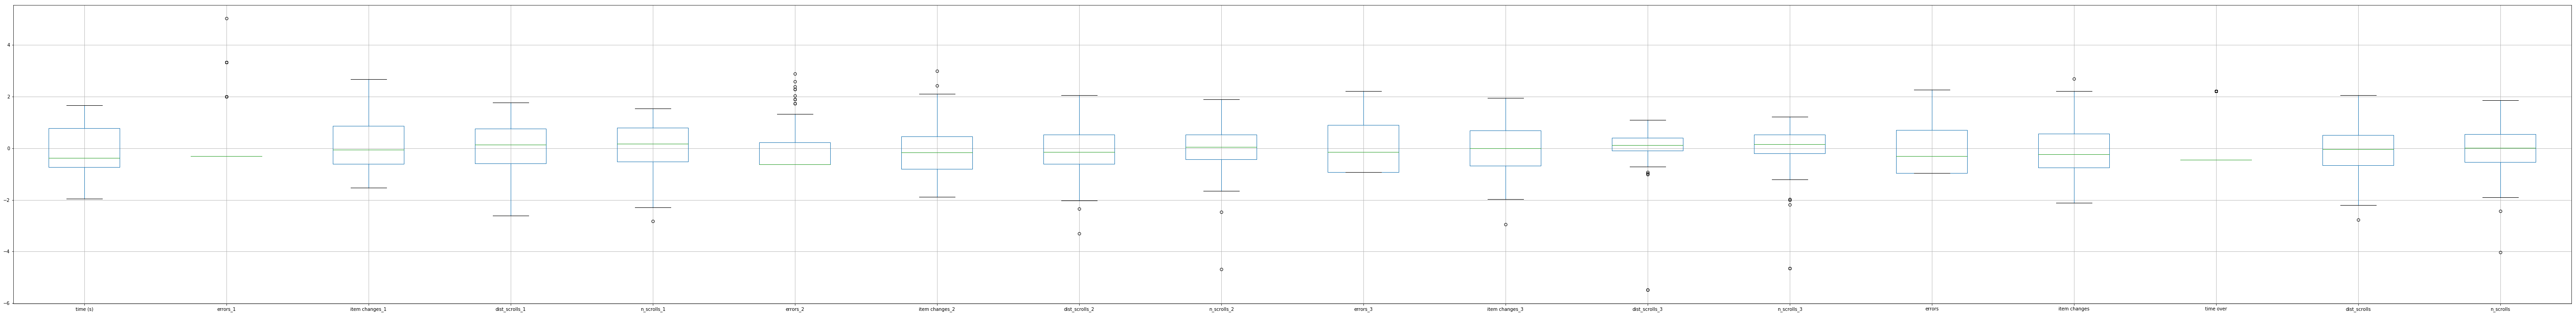

In [41]:
plt.figure(figsize=(100,12))
dataStd.boxplot()

### Interpretación de los clusters, con k = 3

Repetimos el análisis con k=3

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [43]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 36, 1: 22, 2: 19})


In [44]:
var_num = ['time (s)','errors_1','item changes_1','dist_scrolls_1','n_scrolls_1','errors_2','item changes_2','dist_scrolls_2','n_scrolls_2','errors_3','item changes_3','dist_scrolls_3','n_scrolls_3','errors','item changes','time over','dist_scrolls','n_scrolls']

In [45]:
import warnings
warnings.filterwarnings('ignore')

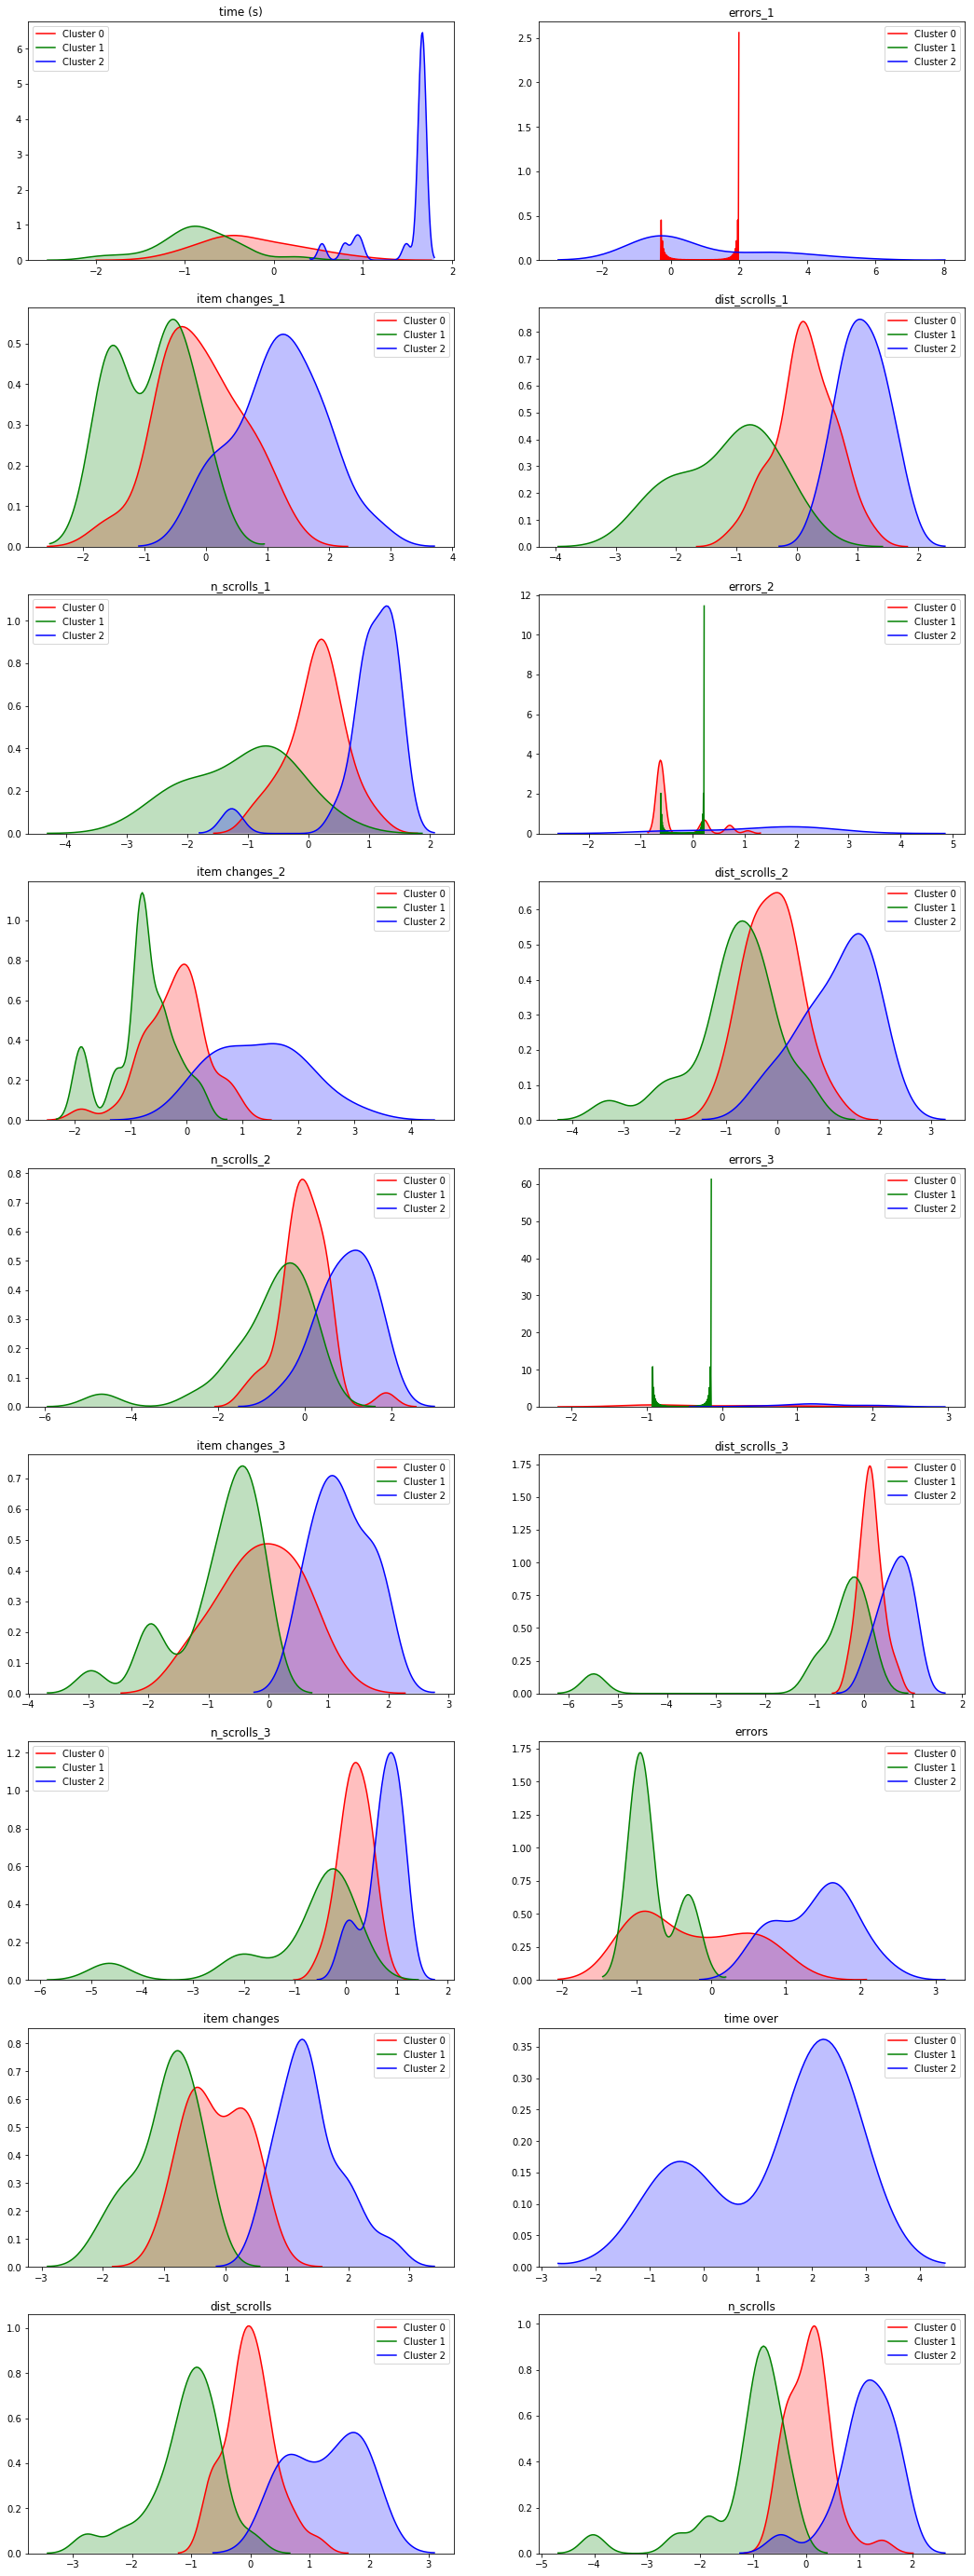

In [46]:
fig = plt.figure(figsize=(18,50))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

## K-Means survey variables

In [129]:
data = pd.read_csv('webdata2.csv', na_values=".")
print(data.shape)
data = data.drop("ID", axis=1) # droping ID column
data = data.iloc[:,18:]
print(data.shape)
data.head(5)

(77, 48)
(77, 29)


satisfaction  satisfaction (s)  mental  physical  temporal  performance  \
0            33                12       8         2         3           10   
1            31                 5      10        10        10            1   
2            35                12       8         1         8            3   
3            28                17       6         3         9            4   
4            42                14       4         1         5            7   

   effort  frustration music perception  time perception     ...      \
0       8            1            Lenta                4     ...       
1      10           10            Lenta               15     ...       
2       9            8           Rapida               15     ...       
3       6            7            Lenta               10     ...       
4       4            6            Lenta               10     ...       

   music likability  music pleasant  music good  music familiarity  \
0                 4               7           4                  2   
1                 1               1           1                  1   
2                 1               1           1                  1   
3                 3               2           2                  4   
4                 4               3           3                  5   

   music nostalgia  music relevance  gender  age  musical education  \
0                6                7  Hombre   21                  0   
1                1                1   Mujer   21                  0   
2                1                1   Mujer   23                  0   
3                6                6   Mujer   19                  2   
4                2                4   Mujer   21                  0   

   diff_times  
0          54  
1           0  
2         185  
3         200  
4         116  

[5 rows x 29 columns]

In [135]:
data.describe(include="all")

satisfaction  satisfaction (s)    mental   physical   temporal  \
count      77.000000         77.000000  77.00000  77.000000  77.000000   
unique           NaN               NaN       NaN        NaN        NaN   
top              NaN               NaN       NaN        NaN        NaN   
freq             NaN               NaN       NaN        NaN        NaN   
mean       36.688312         24.389610   6.00000   2.909091   5.597403   
std        12.820891         18.742827   2.13369   2.329343   2.671781   
min         1.000000          2.000000   2.00000   1.000000   1.000000   
25%        31.000000         12.000000   4.00000   1.000000   3.000000   
50%        39.000000         19.000000   6.00000   2.000000   5.000000   
75%        44.000000         35.000000   7.00000   4.000000   8.000000   
max        60.000000        126.000000  10.00000  10.000000  10.000000   

        performance     effort  frustration music perception  time perception  \
count     77.000000  77.000000    77.000000               77        77.000000   
unique          NaN        NaN          NaN                3              NaN   
top             NaN        NaN          NaN            Lenta              NaN   
freq            NaN        NaN          NaN               45              NaN   
mean       6.363636   5.857143     4.415584              NaN        17.012987   
std        2.610248   2.075637     2.745094              NaN        60.533047   
min        1.000000   1.000000     1.000000              NaN         3.000000   
25%        5.000000   4.000000     2.000000              NaN         7.000000   
50%        7.000000   6.000000     4.000000              NaN        10.000000   
75%        8.000000   7.000000     6.000000              NaN        13.000000   
max       10.000000  10.000000    10.000000              NaN       540.000000   

            ...       music likability  music pleasant  music good  \
count       ...              77.000000       77.000000   77.000000   
unique      ...                    NaN             NaN         NaN   
top         ...                    NaN             NaN         NaN   
freq        ...                    NaN             NaN         NaN   
mean        ...               3.532468        3.792208    3.597403   
std         ...               2.131125        2.220346    2.147580   
min         ...               1.000000        1.000000    1.000000   
25%         ...               1.000000        1.000000    1.000000   
50%         ...               3.000000        4.000000    4.000000   
75%         ...               5.000000        6.000000    5.000000   
max         ...               7.000000        7.000000    7.000000   

        music familiarity  music nostalgia  music relevance  gender  \
count           77.000000        77.000000        77.000000      77   
unique                NaN              NaN              NaN       2   
top                   NaN              NaN              NaN   Mujer   
freq                  NaN              NaN              NaN      44   
mean             3.714286         2.974026         3.103896     NaN   
std              2.145112         2.194335         2.167854     NaN   
min              1.000000         1.000000         1.000000     NaN   
25%              2.000000         1.000000         1.000000     NaN   
50%              4.000000         2.000000         3.000000     NaN   
75%              5.000000         5.000000         5.000000     NaN   
max              7.000000         7.000000         7.000000     NaN   

              age  musical education    diff_times  
count   77.000000          77.000000     77.000000  
unique        NaN                NaN           NaN  
top           NaN                NaN           NaN  
freq          NaN                NaN           NaN  
mean    22.051948           0.311688    550.519481  
std      7.528710           0.590712   3618.303948  
min     16.000000           0.000000      0.000000  
25%     19.000000           

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 29 columns):
satisfaction            77 non-null int64
satisfaction (s)        77 non-null int64
mental                  77 non-null int64
physical                77 non-null int64
temporal                77 non-null int64
performance             77 non-null int64
effort                  77 non-null int64
frustration             77 non-null int64
music perception        77 non-null object
time perception         77 non-null int64
good attitude           77 non-null int64
favorable attitude      77 non-null int64
likable attitude        77 non-null int64
appealing attitude      77 non-null int64
result satisfaction     77 non-null int64
music attention         77 non-null int64
music over activity     77 non-null int64
brain music             77 non-null int64
following music         77 non-null int64
music likability        77 non-null int64
music pleasant          77 non-null int64
music good    

In [137]:
dataStd1 = pd.DataFrame(preprocessing.scale(data.iloc[:,0:8]))
dataStd1.columns=data.columns[0:8]

dataStd2 = pd.DataFrame(preprocessing.scale(data.iloc[:,9:25]))
dataStd2.columns=data.columns[9:25]

dataStd3 = pd.DataFrame(preprocessing.scale(data.iloc[:,26:29]))
dataStd3.columns=data.columns[26:29]

dataStd = pd.concat([dataStd1, dataStd2, dataStd3], axis=1, sort=False)

In [138]:
dataStd.mean(axis=0)

satisfaction            2.047424e-16
satisfaction (s)       -1.441848e-18
mental                 -1.441848e-17
physical               -7.497610e-17
temporal               -4.613914e-17
performance             1.268826e-16
effort                  1.384174e-16
frustration            -4.325544e-17
time perception         3.226135e-17
good attitude          -2.739511e-16
favorable attitude     -1.759055e-16
likable attitude       -2.883696e-17
appealing attitude      1.131851e-16
result satisfaction     2.941370e-16
music attention         1.182315e-16
music over activity    -2.306957e-17
brain music             1.326500e-16
following music         2.018587e-17
music likability       -1.441848e-17
music pleasant          4.037175e-17
music good             -1.441848e-17
music familiarity       0.000000e+00
music nostalgia        -7.785980e-17
music relevance         1.153478e-17
age                     1.730218e-16
musical education       5.479023e-17
diff_times             -1.838356e-17
d

In [139]:
dataStd.std(axis=0)

satisfaction            1.006557
satisfaction (s)        1.006557
mental                  1.006557
physical                1.006557
temporal                1.006557
performance             1.006557
effort                  1.006557
frustration             1.006557
time perception         1.006557
good attitude           1.006557
favorable attitude      1.006557
likable attitude        1.006557
appealing attitude      1.006557
result satisfaction     1.006557
music attention         1.006557
music over activity     1.006557
brain music             1.006557
following music         1.006557
music likability        1.006557
music pleasant          1.006557
music good              1.006557
music familiarity       1.006557
music nostalgia         1.006557
music relevance         1.006557
age                     1.006557
musical education       1.006557
diff_times              1.006557
dtype: float64

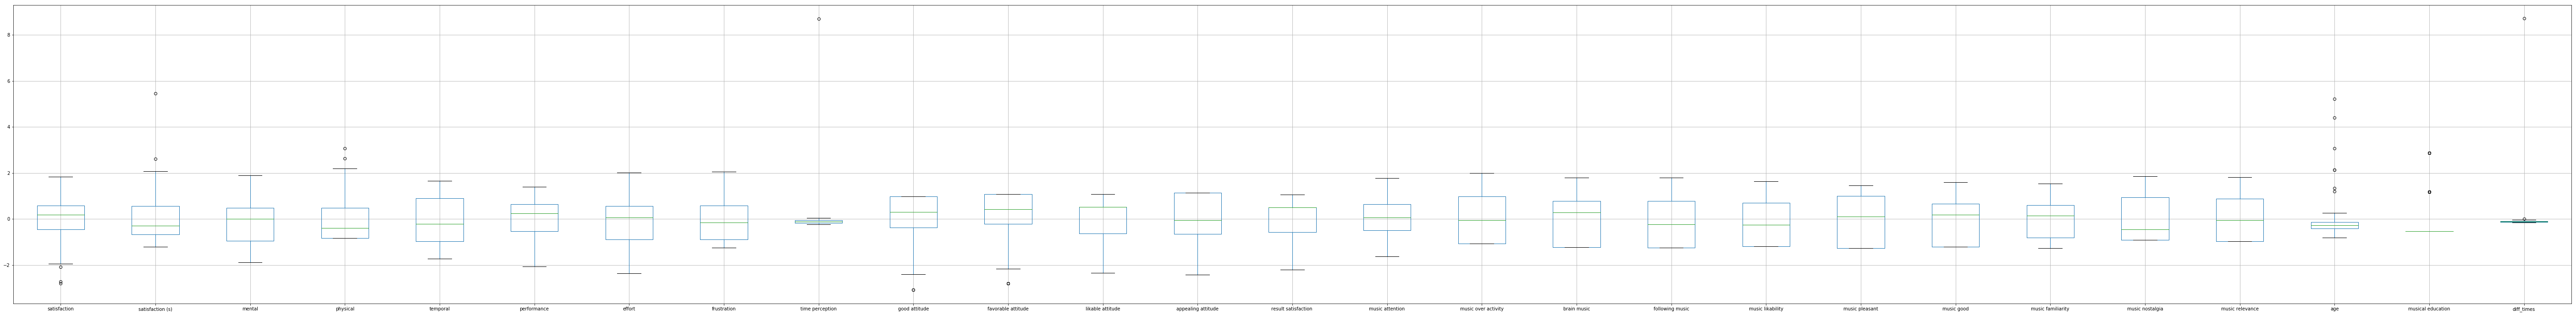

In [134]:
plt.figure(figsize=(100,12))
dataStd.boxplot()

### Interpretación de los clusters, con k = 3

Repetimos el análisis con k=3

In [141]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [142]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({2: 35, 0: 27, 1: 15})


In [143]:
var_num = ['satisfaction','satisfaction (s)','mental','physical','temporal','performance','effort','frustration','time perception','good attitude','favorable attitude','likable attitude','appealing attitude','result satisfaction ','music attention','music over activity','brain music','following music','music likability','music pleasant','music good','music familiarity','music nostalgia','music relevance','age','musical education','diff_times']

In [144]:
import warnings
warnings.filterwarnings('ignore')

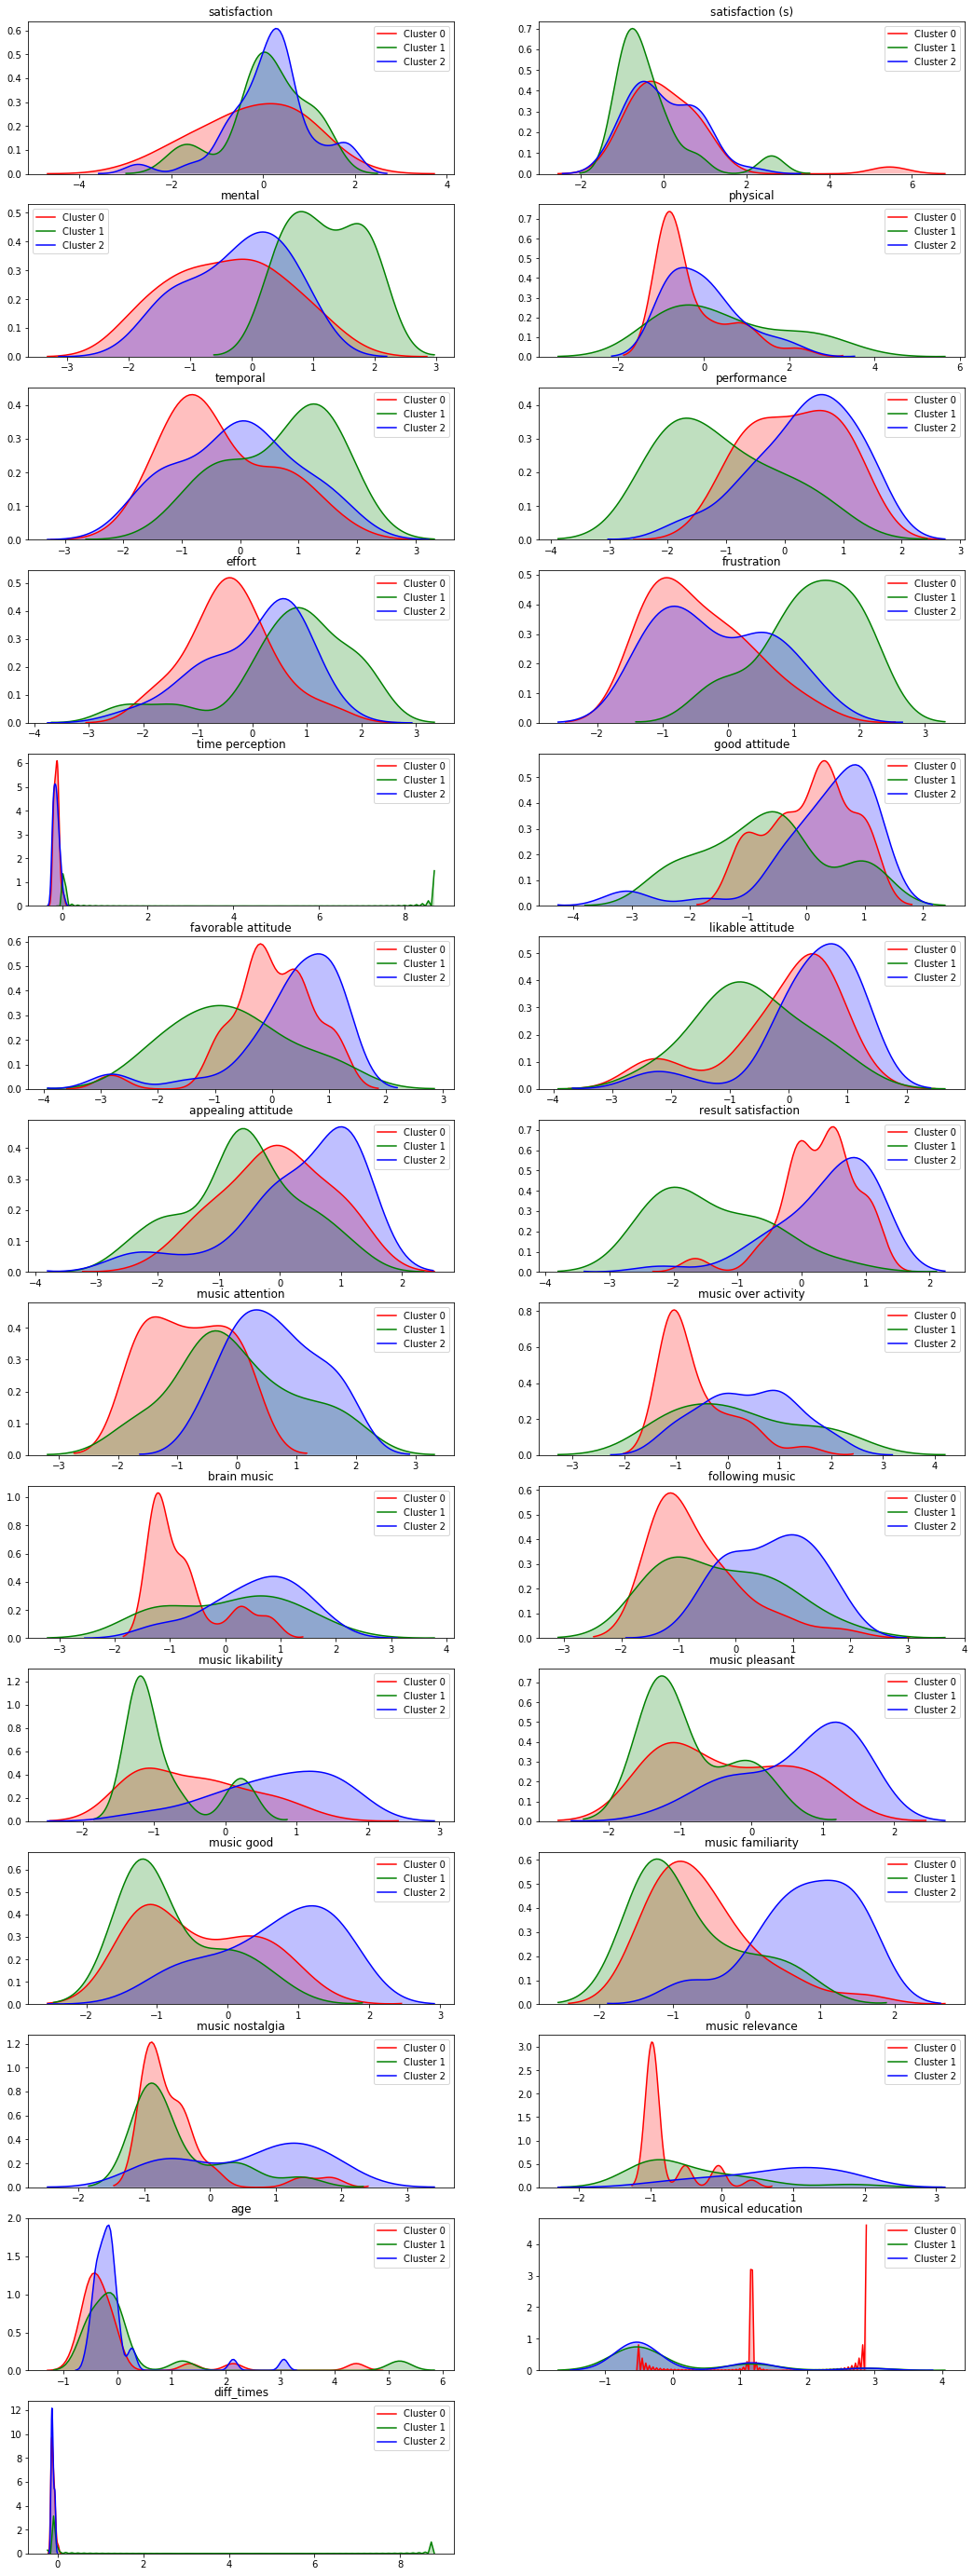

In [145]:
fig = plt.figure(figsize=(18,50))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

## K-Means sin tercios

In [152]:
data = pd.read_csv('webdata2.csv', na_values=".")
print(data.shape)
data = data.drop("ID", axis=1) # droping ID column
print(data.shape)
data1 = data.iloc[:,0:1]
data1.columns = data.columns[0:1]
data2= data.iloc[:,13:]
data2.columns = data.columns[13:]
data = pd.concat([data1, data2], axis=1, sort=False)
print(data.shape)
data.head(5)

(77, 48)
(77, 47)
(77, 35)


time (s)  errors  item changes  time over  dist_scrolls  n_scrolls  \
0       294       0            10          0         76752       2693   
1       900      16            27          1        213775       4695   
2       715      12            55          0        318574       5691   
3       400       1            13          0         76692       2052   
4       484       2            21          0        194866       2795   

   satisfaction  satisfaction (s)  mental  physical     ...      \
0            33                12       8         2     ...       
1            31                 5      10        10     ...       
2            35                12       8         1     ...       
3            28                17       6         3     ...       
4            42                14       4         1     ...       

   music likability  music pleasant  music good  music familiarity  \
0                 4               7           4                  2   
1                 1               1           1                  1   
2                 1               1           1                  1   
3                 3               2           2                  4   
4                 4               3           3                  5   

  music nostalgia  music relevance  gender  age  musical education  diff_times  
0               6                7  Hombre   21                  0          54  
1               1                1   Mujer   21                  0           0  
2               1                1   Mujer   23                  0         185  
3               6                6   Mujer   19                  2         200  
4               2                4   Mujer   21                  0         116  

[5 rows x 35 columns]

In [153]:
data.describe(include="all")

time (s)     errors  item changes  time over   dist_scrolls  \
count    77.000000  77.000000      77.00000  77.000000      77.000000   
unique         NaN        NaN           NaN        NaN            NaN   
top            NaN        NaN           NaN        NaN            NaN   
freq           NaN        NaN           NaN        NaN            NaN   
mean    493.272727   4.220779      19.87013   0.168831  111711.363636   
std     245.528948   6.538597      16.86116   0.377059   90741.189421   
min      16.000000   0.000000       3.00000   0.000000   11050.000000   
25%     313.000000   0.000000       9.00000   0.000000   52422.000000   
50%     403.000000   1.000000      13.00000   0.000000   82892.000000   
75%     684.000000   5.000000      23.00000   0.000000  124106.000000   
max     900.000000  31.000000      98.00000   1.000000  383783.000000   

          n_scrolls  satisfaction  satisfaction (s)    mental   physical  \
count     77.000000     77.000000         77.000000  77.00000  77.000000   
unique          NaN           NaN               NaN       NaN        NaN   
top             NaN           NaN               NaN       NaN        NaN   
freq            NaN           NaN               NaN       NaN        NaN   
mean    2862.818182     36.688312         24.389610   6.00000   2.909091   
std     1842.901393     12.820891         18.742827   2.13369   2.329343   
min      152.000000      1.000000          2.000000   2.00000   1.000000   
25%     1627.000000     31.000000         12.000000   4.00000   1.000000   
50%     2368.000000     39.000000         19.000000   6.00000   2.000000   
75%     3387.000000     44.000000         35.000000   7.00000   4.000000   
max     8184.000000     60.000000        126.000000  10.00000  10.000000   

            ...       music likability  music pleasant  music good  \
count       ...              77.000000       77.000000   77.000000   
unique      ...                    NaN             NaN         NaN   
top         ...                    NaN             NaN         NaN   
freq        ...                    NaN             NaN         NaN   
mean        ...               3.532468        3.792208    3.597403   
std         ...               2.131125        2.220346    2.147580   
min         ...               1.000000        1.000000    1.000000   
25%         ...               1.000000        1.000000    1.000000   
50%         ...               3.000000        4.000000    4.000000   
75%         ...               5.000000        6.000000    5.000000   
max         ...               7.000000        7.000000    7.000000   

        music familiarity music nostalgia  music relevance  gender        age  \
count           77.000000       77.000000        77.000000      77  77.000000   
unique                NaN             NaN              NaN       2        NaN   
top                   NaN             NaN              NaN   Mujer        NaN   
freq                  NaN             NaN              NaN      44        NaN   
mean             3.714286        2.974026         3.103896     NaN  22.051948   
std              2.145112        2.194335         2.167854     NaN   7.528710   
min              1.000000        1.000000         1.000000     NaN  16.000000   
25%              2.000000        1.000000         1.000000     NaN  19.000000   
50%              4.000000        2.000000         3.000000     NaN  20.000000   
75%              5.000000        5.000000         5.000000     NaN  21.000000   
max              7.000000        7.000000         7.000000     NaN  61.000000   

        musical education    diff_times  
count           77.000000     77.000000  
unique                NaN           NaN  
top                   NaN           NaN  
freq                  NaN           NaN  
mean             0.311688    550.519481  
std              0.590712   3618.303948  
min              0.000000      0.000000  
25%              0.000000     37.000000  
50%              0.000000   

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 35 columns):
time (s)                77 non-null int64
errors                  77 non-null int64
item changes            77 non-null int64
time over               77 non-null int64
dist_scrolls            77 non-null int64
n_scrolls               77 non-null int64
satisfaction            77 non-null int64
satisfaction (s)        77 non-null int64
mental                  77 non-null int64
physical                77 non-null int64
temporal                77 non-null int64
performance             77 non-null int64
effort                  77 non-null int64
frustration             77 non-null int64
music perception        77 non-null object
time perception         77 non-null int64
good attitude           77 non-null int64
favorable attitude      77 non-null int64
likable attitude        77 non-null int64
appealing attitude      77 non-null int64
result satisfaction     77 non-null int64
music attentio

In [155]:
dataStd1 = pd.DataFrame(preprocessing.scale(data.iloc[:,0:14]))
dataStd1.columns=data.columns[0:14]

dataStd2 = pd.DataFrame(preprocessing.scale(data.iloc[:,15:31]))
dataStd2.columns=data.columns[15:31]

dataStd3 = pd.DataFrame(preprocessing.scale(data.iloc[:,32:]))
dataStd3.columns=data.columns[32:]

dataStd = pd.concat([dataStd1, dataStd2, dataStd3], axis=1, sort=False)
# dataStd = data
# dataStd.iloc[:,0:21] = dataStd1
# dataStd.iloc[:,22:34] = dataStd2
# dataStd.iloc[:,35:51] = dataStd3

In [157]:
dataStd.mean(axis=0)

time (s)                1.326500e-16
errors                 -7.209240e-17
item changes            8.074349e-17
time over               6.344132e-17
dist_scrolls           -1.369756e-17
n_scrolls              -9.372013e-17
satisfaction            2.047424e-16
satisfaction (s)       -1.441848e-18
mental                 -1.441848e-17
physical               -7.497610e-17
temporal               -4.613914e-17
performance             1.268826e-16
effort                  1.384174e-16
frustration            -4.325544e-17
time perception         3.226135e-17
good attitude          -2.739511e-16
favorable attitude     -1.759055e-16
likable attitude       -2.883696e-17
appealing attitude      1.131851e-16
result satisfaction     2.941370e-16
music attention         1.182315e-16
music over activity    -2.306957e-17
brain music             1.326500e-16
following music         2.018587e-17
music likability       -1.441848e-17
music pleasant          4.037175e-17
music good             -1.441848e-17
m

In [158]:
dataStd.std(axis=0)

time (s)                1.006557
errors                  1.006557
item changes            1.006557
time over               1.006557
dist_scrolls            1.006557
n_scrolls               1.006557
satisfaction            1.006557
satisfaction (s)        1.006557
mental                  1.006557
physical                1.006557
temporal                1.006557
performance             1.006557
effort                  1.006557
frustration             1.006557
time perception         1.006557
good attitude           1.006557
favorable attitude      1.006557
likable attitude        1.006557
appealing attitude      1.006557
result satisfaction     1.006557
music attention         1.006557
music over activity     1.006557
brain music             1.006557
following music         1.006557
music likability        1.006557
music pleasant          1.006557
music good              1.006557
music familiarity       1.006557
music nostalgia         1.006557
music relevance         1.006557
age       

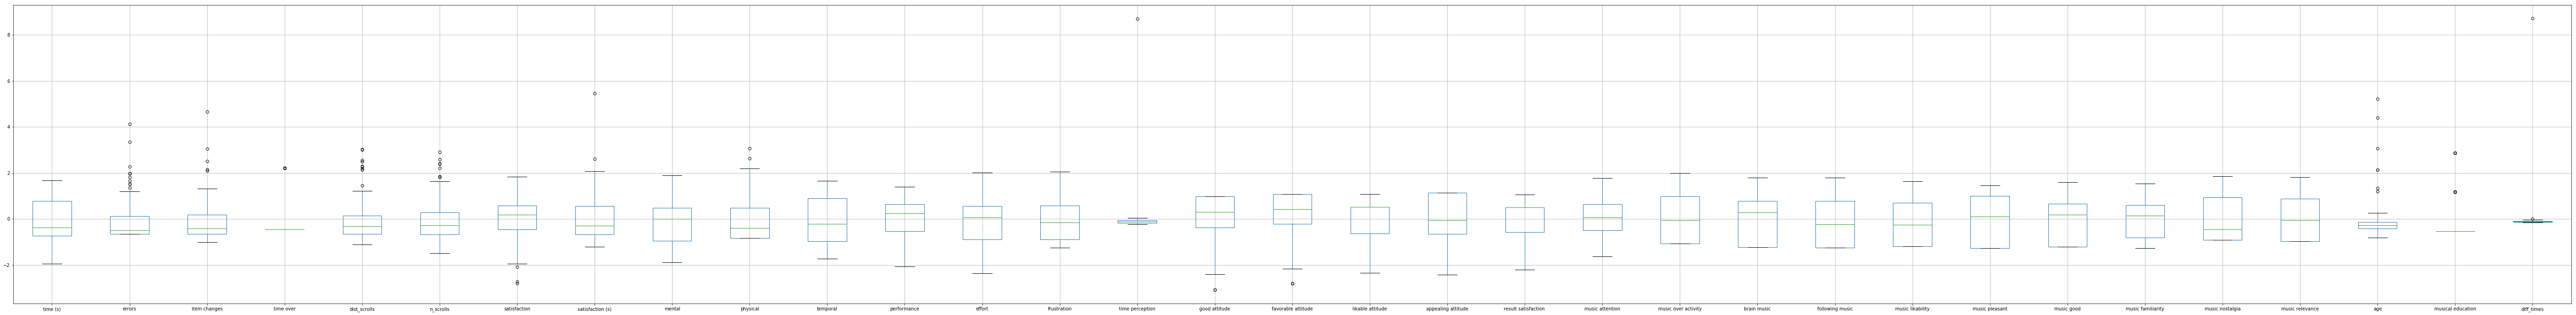

In [159]:
plt.figure(figsize=(100,12))
dataStd.boxplot()

### Interpretación de los clusters, con k = 3

Repetimos el análisis con k=3

In [160]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [161]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 36, 0: 26, 2: 15})


In [162]:
var_num = ['time (s)','errors','item changes','time over','dist_scrolls','n_scrolls','satisfaction','satisfaction (s)','mental','physical','temporal','performance','effort','frustration','time perception','good attitude','favorable attitude','likable attitude','appealing attitude','result satisfaction ','music attention','music over activity','brain music','following music','music likability','music pleasant','music good','music familiarity','music nostalgia','music relevance','age','musical education','diff_times']

In [163]:
import warnings
warnings.filterwarnings('ignore')

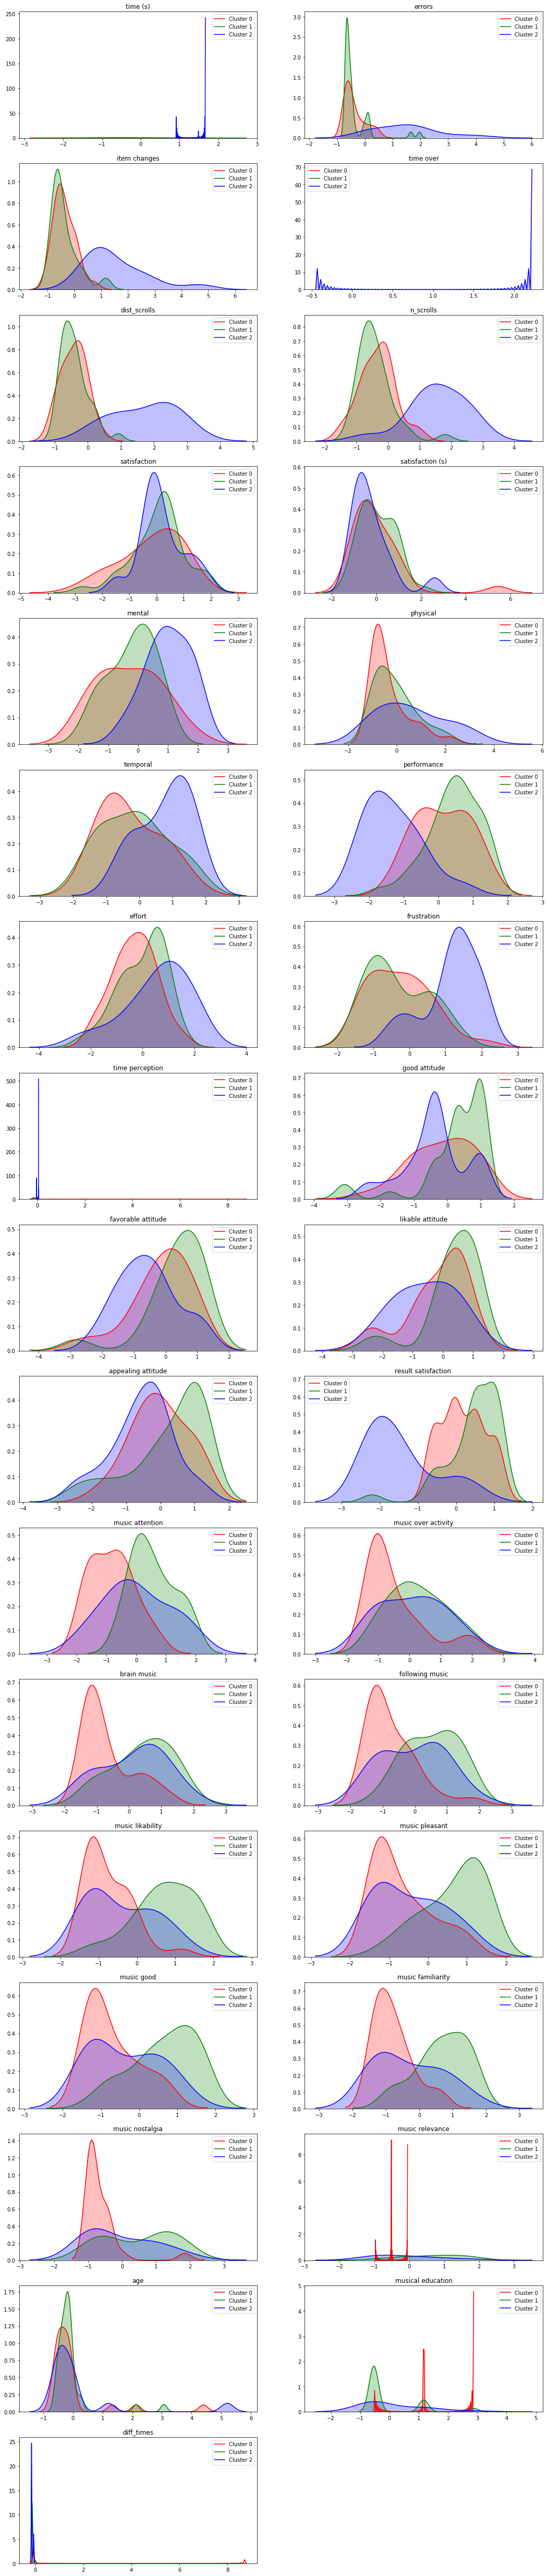

In [164]:
fig = plt.figure(figsize=(18,90))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

## K-Means con time_diff droping thirds data

In [43]:
data = data.drop("dist_scrollup_1", axis=1)
print(data.shape)
data.head(5)

(77, 56)
(77, 55)


time (s)  errors_1  item changes_1  dist_scrollup_1  n_scrollup_1  \
0       294         0               0             2900           160   
1       900         0               5            11574           284   
2       715         0               7            22466           526   
3       400         0               3             5000           214   
4       484         0               3             5600           233   

   dist_scrolldown_1  n_scrolldown_1  errors_2  item changes_2  \
0               4016             195         0               5   
1              15924             615        13              11   
2              26752             663         6              19   
3               6882             383         1               1   
4               9882             489         0               6   

   dist_scrollup_2     ...      music likability  music pleasant  music good  \
0            11600     ...                     4               7           4   
1            38320     ...                     1               1           1   
2            53938     ...                     1               1           1   
3            14365     ...                     3               2           2   
4            36170     ...                     4               3           3   

   music familiarity  music nostalgia  music relevance  gender  age  \
0                  2                6                7  Hombre   21   
1                  1                1                1   Mujer   21   
2                  1                1                1   Mujer   23   
3                  4                6                6   Mujer   19   
4                  5                2                4   Mujer   21   

   musical education  diff_times  
0                  0          54  
1                  0           0  
2                  0         185  
3                  2         200  
4                  0         116  

[5 rows x 55 columns]

In [44]:
data.describe(include="all")

time (s)   errors_1  item changes_1  dist_scrollup_1  n_scrollup_1  \
count    77.000000  77.000000       77.000000        77.000000     77.000000   
unique         NaN        NaN             NaN              NaN           NaN   
top            NaN        NaN             NaN              NaN           NaN   
freq           NaN        NaN             NaN              NaN           NaN   
mean    493.272727   0.168831        3.207792      9756.181818    318.701299   
std     245.528948   0.615643        3.784795      9856.519930    268.324483   
min      16.000000   0.000000        0.000000         0.000000      0.000000   
25%     313.000000   0.000000        1.000000      2500.000000    125.000000   
50%     403.000000   0.000000        2.000000      6300.000000    243.000000   
75%     684.000000   0.000000        5.000000     13693.000000    418.000000   
max     900.000000   4.000000       22.000000     45779.000000   1063.000000   

        dist_scrolldown_1  n_scrolldown_1   errors_2  item changes_2  \
count           77.000000       77.000000  77.000000       77.000000   
unique                NaN             NaN        NaN             NaN   
top                   NaN             NaN        NaN             NaN   
freq                  NaN             NaN        NaN             NaN   
mean         11839.792208      476.506494   1.636364        7.480519   
std          10679.139337      303.154018   3.414016        7.338812   
min            700.000000       41.000000   0.000000        1.000000   
25%           4016.000000      225.000000   0.000000        3.000000   
50%           7900.000000      417.000000   0.000000        5.000000   
75%          16407.000000      704.000000   1.000000        8.000000   
max          49937.000000     1201.000000  17.000000       45.000000   

        dist_scrollup_2      ...       music likability  music pleasant  \
count         77.000000      ...              77.000000       77.000000   
unique              NaN      ...                    NaN             NaN   
top                 NaN      ...                    NaN             NaN   
freq                NaN      ...                    NaN             NaN   
mean       18972.558442      ...               3.532468        3.792208   
std        15611.722201      ...               2.131125        2.220346   
min            0.000000      ...               1.000000        1.000000   
25%         8800.000000      ...               1.000000        1.000000   
50%        13090.000000      ...               3.000000        4.000000   
75%        22252.000000      ...               5.000000        6.000000   
max        68514.000000      ...               7.000000        7.000000   

        music good  music familiarity  music nostalgia  music relevance  \
count    77.000000          77.000000        77.000000        77.000000   
unique         NaN                NaN              NaN              NaN   
top            NaN                NaN              NaN              NaN   
freq           NaN                NaN              NaN              NaN   
mean      3.597403           3.714286         2.974026         3.103896   
std       2.147580           2.145112         2.194335         2.167854   
min       1.000000           1.000000         1.000000         1.000000   
25%       1.000000           2.000000         1.000000         1.000000   
50%       4.000000           4.000000         2.000000         3.000000   
75%       5.000000           5.000000         5.000000         5.000000   
max       7.000000           7.000000         7.000000         7.000000   

        gender        age  musical education    diff_times  
count       77  77.000000          77.000000     77.000000  
unique       2        NaN                NaN           NaN  
top      Mujer        NaN                NaN           NaN  
freq        44        NaN                NaN           NaN  
mean       NaN  22.051948           0.311688    550.519481  
std        NaN  

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 55 columns):
time (s)                77 non-null int64
errors_1                77 non-null int64
item changes_1          77 non-null int64
dist_scrollup_1         77 non-null int64
n_scrollup_1            77 non-null int64
dist_scrolldown_1       77 non-null int64
n_scrolldown_1          77 non-null int64
errors_2                77 non-null int64
item changes_2          77 non-null int64
dist_scrollup_2         77 non-null int64
n_scrollup_2            77 non-null int64
dist_scrolldown_2       77 non-null int64
n_scrolldown_2          77 non-null int64
errors_3                77 non-null int64
item changes_3          77 non-null int64
dist_scrollup_3         77 non-null int64
n_scrollup_3            77 non-null int64
dist_scrolldown_3       77 non-null int64
n_scrolldown_3          77 non-null int64
errors                  77 non-null int64
item changes            77 non-null int64
time over      

In [46]:
data.age = data.age.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 55 columns):
time (s)                77 non-null int64
errors_1                77 non-null int64
item changes_1          77 non-null int64
dist_scrollup_1         77 non-null int64
n_scrollup_1            77 non-null int64
dist_scrolldown_1       77 non-null int64
n_scrolldown_1          77 non-null int64
errors_2                77 non-null int64
item changes_2          77 non-null int64
dist_scrollup_2         77 non-null int64
n_scrollup_2            77 non-null int64
dist_scrolldown_2       77 non-null int64
n_scrolldown_2          77 non-null int64
errors_3                77 non-null int64
item changes_3          77 non-null int64
dist_scrollup_3         77 non-null int64
n_scrollup_3            77 non-null int64
dist_scrolldown_3       77 non-null int64
n_scrolldown_3          77 non-null int64
errors                  77 non-null int64
item changes            77 non-null int64
time over      

In [48]:
dataStd1 = pd.DataFrame(preprocessing.scale(data.iloc[:,0:34]))
dataStd1.columns=data.columns[0:34]

dataStd2 = pd.DataFrame(preprocessing.scale(data.iloc[:,35:51]))
dataStd2.columns=data.columns[35:51]

dataStd3 = pd.DataFrame(preprocessing.scale(data.iloc[:,53:55]))
dataStd3.columns=data.columns[53:55]

dataStd = pd.concat([dataStd1, dataStd2, dataStd3], axis=1, sort=False)
# dataStd = data
# dataStd.iloc[:,0:21] = dataStd1
# dataStd.iloc[:,22:34] = dataStd2
# dataStd.iloc[:,35:51] = dataStd3

In [49]:
dataStd.mean(axis=0)

time (s)                1.326500e-16
errors_1               -5.046468e-17
item changes_1         -7.209240e-19
dist_scrollup_1         1.441848e-18
n_scrollup_1            2.595327e-17
dist_scrolldown_1      -8.651089e-17
n_scrolldown_1          5.190653e-17
errors_2               -2.306957e-17
item changes_2          4.037175e-17
dist_scrollup_2        -4.902283e-17
n_scrollup_2            7.930164e-17
dist_scrolldown_2       1.441848e-18
n_scrolldown_2          7.497610e-17
errors_3                5.190653e-17
item changes_3          4.325544e-17
dist_scrollup_3        -9.912706e-17
n_scrollup_3            7.209240e-17
dist_scrolldown_3       3.099973e-17
n_scrolldown_3         -4.404395e-17
errors                 -7.209240e-17
item changes            8.074349e-17
time over               6.344132e-17
dist_scrollup          -1.009294e-17
n_scrollup              1.874403e-17
dist_scrolldown         9.155735e-17
n_scrolldown            8.506904e-17
satisfaction            2.047424e-16
s

In [50]:
dataStd.std(axis=0)

time (s)                1.006557
errors_1                1.006557
item changes_1          1.006557
dist_scrollup_1         1.006557
n_scrollup_1            1.006557
dist_scrolldown_1       1.006557
n_scrolldown_1          1.006557
errors_2                1.006557
item changes_2          1.006557
dist_scrollup_2         1.006557
n_scrollup_2            1.006557
dist_scrolldown_2       1.006557
n_scrolldown_2          1.006557
errors_3                1.006557
item changes_3          1.006557
dist_scrollup_3         1.006557
n_scrollup_3            1.006557
dist_scrolldown_3       1.006557
n_scrolldown_3          1.006557
errors                  1.006557
item changes            1.006557
time over               1.006557
dist_scrollup           1.006557
n_scrollup              1.006557
dist_scrolldown         1.006557
n_scrolldown            1.006557
satisfaction            1.006557
satisfaction (s)        1.006557
mental                  1.006557
physical                1.006557
temporal  

### Interpretación de los clusters, con k = 3

Repetimos el análisis con k=3

In [51]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [52]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 34, 2: 29, 1: 14})


In [57]:
var_num = ['time (s)','errors_1','item changes_1','dist_scrollup_1','n_scrollup_1','dist_scrolldown_1','n_scrolldown_1','errors_2','item changes_2','dist_scrollup_2','n_scrollup_2','dist_scrolldown_2','n_scrolldown_2','errors_3','item changes_3','dist_scrollup_3','n_scrollup_3','dist_scrolldown_3','n_scrolldown_3','errors','item changes','time over','dist_scrollup','n_scrollup','dist_scrolldown','n_scrolldown','satisfaction','satisfaction (s)','mental','physical','temporal','performance','effort','frustration','time perception','good attitude','favorable attitude','likable attitude','appealing attitude','result satisfaction ','music attention','music over activity','brain music','following music','music likability','music pleasant','music good','music familiarity','music nostalgia','music relevance','musical education', 'diff_times']

In [58]:
import warnings
warnings.filterwarnings('ignore')

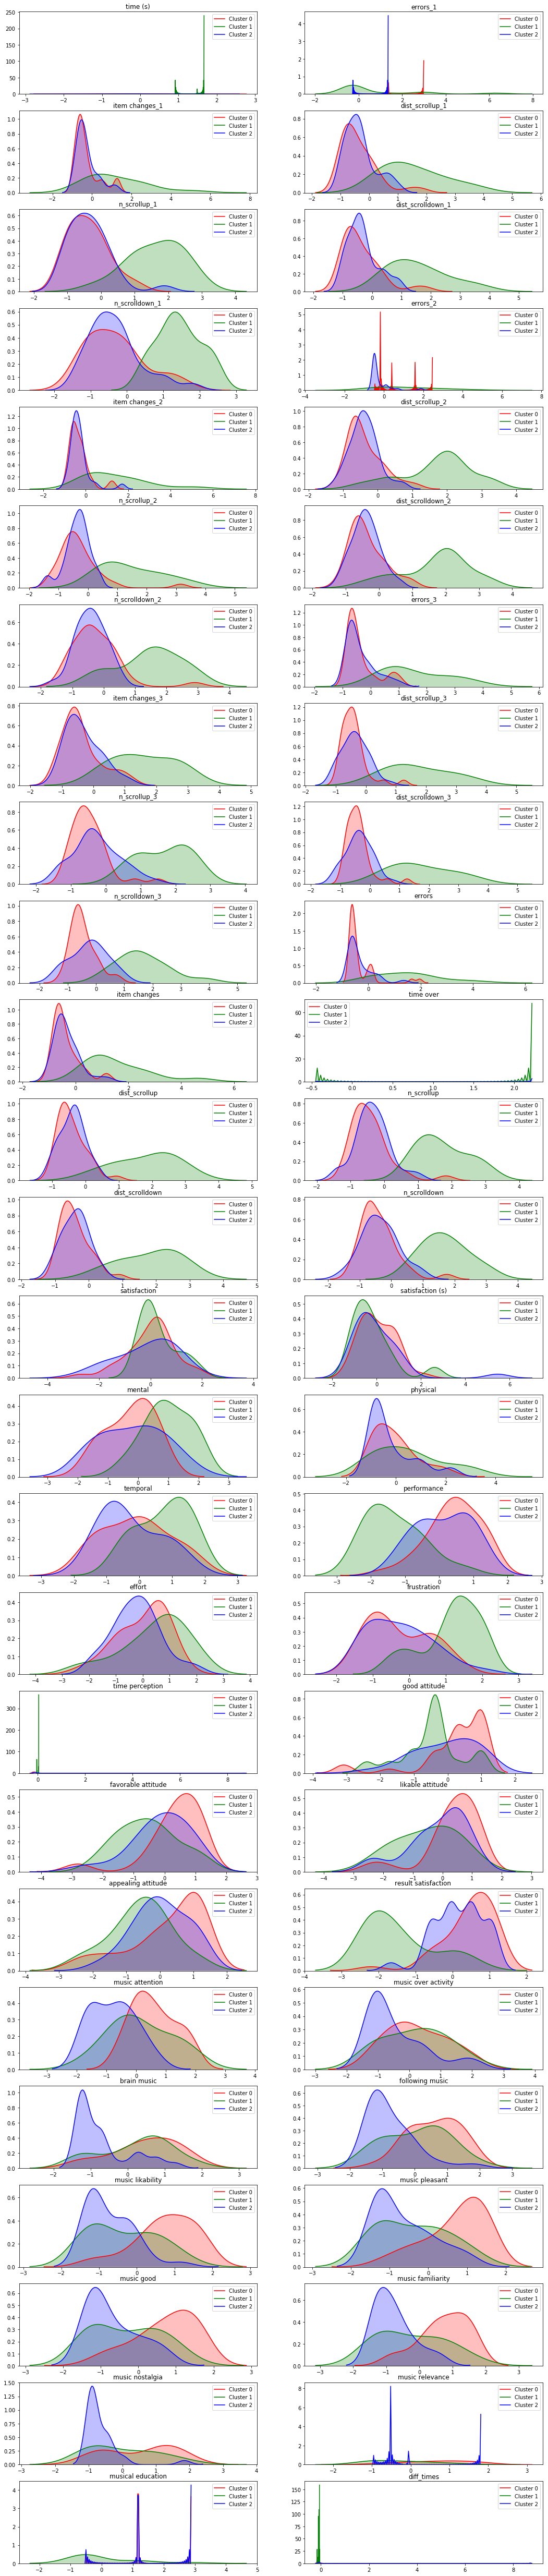

In [59]:
fig = plt.figure(figsize=(18,90))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

## Interpretación de los clusters, con k =2

Repetimos el análisis con k=2

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(dataStd.iloc[:, 0:6])
clusters = kmeans.labels_

In [ ]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

In [ ]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1'])
    i+=1

Vemos que con K=2, las compras en Delicatessen y Frozen no sirven para discriminar entre los 2 grupos.

Veamoslos en scatterplots para entender mejor las diferencias:

In [ ]:
fig = plt.figure(figsize=(15,7))
colorPalette = ["r", "b"]
ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(x="Fresh", y="Milk", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Milk")
ax = fig.add_subplot(1, 2, 2)
sns.scatterplot(x="Detergents_Paper", y="Grocery", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Detergents_Paper vs. Grocery")
plt.show()

Vemos que con K=2, las compras en Delicatessen y Frozen no sirven para discriminar entre los 2 grupos.

Podemos interpretar entonces los clusters de esta manera:
- Cluster 0 (Rojo, 330 registros). Tiene valores:
    - Altos : Milk, Grocery, Detergents_Paper
    - Medios: 
    - Bajos : Fresh
- Cluster 1 (Azul, 88 registros). Tiene valores:
    - Altos : Fresh
    - Medios: 
    - Bajos : Milk , Grocery, Detergents_Paper    

Son mucho mas separables las categorías cuando K=2, pero puede que la información no sea suficientemente rica para las acciones que se deseen.

# Parte 4. Determinación del K

### Codo


En el atributo *inertia_* queda el valor de la suma de las distancias cuadráticas entre cada punto y el centro del cluster al que pertenece (el **WSS** - Within Sum of Squares, también llamado más genéricamente **SSE** - Sum of Sqaured Errors)

In [ ]:
kmeans.inertia_
kmeans.init

A partir de los valores de WSS se puede crear el plot a partir del cual se aplica la técnica del codo, creando un clustering para diferentes valores de K. Veamos, según el método del codo, cual sería el valor del K en este conjunto de datos:

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    WSSs.append(km.inertia_)
WSSs

In [ ]:
plt.plot(range(1, 15), WSSs)

Con K=3 encontramos aproximadamente el codo. 

### Silueta

Veamos ahora con el método de silueta cuántos clusters deberíamos tener. Obtengamos las siluetas para k = 2, 3, 4 y 5.

Veamos las siluetas de los puntos de cada cluster.
Vamos a crear un bar plot horizontal (barh) para los puntos de cada cluster.

In [ ]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

In [ ]:
k=4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

In [ ]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['red', 'g', 'b', 'y', 'darkorange']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

Con el método de silueta lo más indicado podría ser solo considerar dos clusters.

## Calinski-Harabaz

Intentemos ahora con la métrica de Calinski-Harabasz

In [ ]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    CH = calinski_harabaz_score(dataStd, km.labels_) 
    CHs.append(CH)
CHs

In [ ]:
plt.plot(range(2, 15), CHs)

Para este criterio, el mayor score está en K=2, al igual que con el método de silueta. Pero como ya dijimos, no nos convendría mucho un clustering con solo dos segmentos para este caso de aplicación.
Encontramos que entre mas pequeño el K mejor, pero vemos que después de K=6 encontramos una gran desmejoría.

# Parte 5. Reducción de dimensionalidad con PCA

Vamos a buscar una mejor representación de los datos que nos permita conservar la mayor cantidad de información a través de la transformación de las 6 variables originales en componentes principales.

In [ ]:
pca = PCA()
pca.fit(dataStd.iloc[:, 0:6])

Una vez ajustado el objeto PCA a un dataset, este permite acceder a diferentes aspectos resultantes de la transformación:
- components_: los ejes de los componentes principales en función de las variables originales. Como teníamos 6 variables, vamos a tener 6 PCs, cada uno con las cargas (*loadings*) correspondientes a cada variable original.

In [ ]:
pca.components_

- explained_variance_: la varianza explicada por cada eje en las unidades originales

In [ ]:
pca.explained_variance_

- explained_variance_ratio_: la proporción de la varianza explicada por cada eje, en porcentaje (la suma da 100%).

In [ ]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

El objeto PCA sirve además para pasar de la representación en las dimensiones originales a la de las dimensiones en el espacio de los componentes principales encontrados, a partir de su método transform:

In [ ]:
dataPca = pca.transform(dataStd.iloc[:, 0:6])

Veamos gráficamente la cantidad de información correspondiente a cada componente principal:

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [ ]:
np.sum(pca.explained_variance_ratio_[0:3])

Encontramos que los primeros 3 componentes conservan el 81.6% de la información original, y los primeros 4 el 93.2%.
Vamos a quedarnos solo con los 3 primeros PCs.

In [ ]:
dataPca = dataPca[:,0:3]

In [ ]:
dataPca[0:5]

Vamos a ver los puntos en el nuevo sistema de representación dado por los componentes principales.
Creamos una función que permite plotear tanto los puntos de los datos como los loadings de las variables originales (tomada de https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot).
Esto nos permitirá entender mejor la relación entre componentes principales y variables originales.

In [ ]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid() 

Veamos como nos va con los primeros dos componentes principales:

In [ ]:
biplot(dataPca, pca.components_, 0, 1, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [ ]:
biplot(dataPca, pca.components_, 0, 2, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [ ]:
dataStd.columns[0:6]

In [ ]:
pca.components_

Podemos decir que:
- El componente PC1 representa positivamente las compras de leche en su sentido positivo, y negativamente las compras en Groceries y Frozen. Las otras variables no tienen mayor incidencia.
- El componente PC2 representa sobretodo las compras de Detergentes/Papel y Fresh (positivamente)
- El componente PC3 representa sobretodo las compras de Delicatessen y Fresh (positivamente), y Detergentes/Papel y Frozen (negativamente)

Ahora que ya entendemos el significado de los componentes principales, podemos proseguir a un clustering de los registros en el espacio reducido:

In [ ]:
dataPca = pd.DataFrame(dataPca)
dataPca.columns=['PC1', 'PC2', 'PC3']

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [ ]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

In [ ]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:3]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

Vemos que con K=3, El PC1 sirve para separar bien los puntos del cluster rojo (0), el PC2 sirve para distinguir el cluster verde (2). El cluster azul (1) no se puede separar directamente de los demas a través de uno de los PCs, pero si al considerar los 3 PCs.

Veamoslos en scatterplots para entender mejor las diferencias:

In [ ]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

Vemos que con K=3, en el plot de los 2 primeros PCs podemos separar bien los 3 clusters.
Recordemos que el PC1 representa positivamente las compras de leche en su sentido positivo, y negativamente las compras en Groceries y Frozen, y que el componente PC2 representa sobretodo las compras de Detergentes/Papel y Fresh (positivamente).

**Nota**: Realizar la determinación del número de cluster puede hacerse tanto en el espacio de representación original (ya estandarizado) como en el de los componentes principales (considerandolos todos). Los resultados serán los mismos, ya que tanto el método del codo como el de la silueta se basan en cálculos de distancias, que se conservan después de la transformación en componentes temporales, que no es más que una rotación de los ejes.
